#  Problem Statement :
# Forecast the Airlines Passengers data set. Prepare a document for model explaining.
# How many dummy variables you have created and RMSE value for model. Finally which model you will use for Forecasting.

In [1]:
!pip install plotly


In [2]:
# importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf

from math import sqrt
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings("ignore")

In [3]:
airline=pd.read_excel("Airlines+Data.xlsx")

In [4]:
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [6]:
airline.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [7]:
airline.describe

<bound method NDFrame.describe of         Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]>

In [8]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [9]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [10]:
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

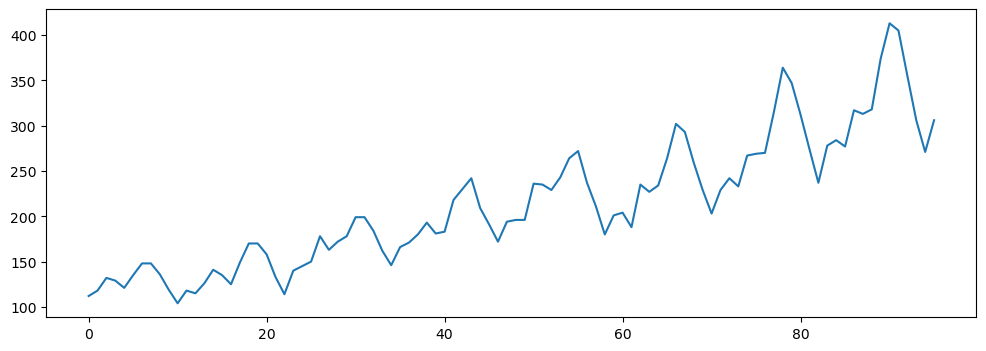

In [11]:
#plotting the passengers column

airline.Passengers.plot(figsize=(12,4));

#  Descriptive Analysis

In [12]:
airline.shape

(96, 2)

In [13]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [14]:
airline.nunique()

Month         96
Passengers    80
dtype: int64

#  Feature Engineering
# Renaming the Month column into Date

In [15]:
airline.rename({"Month":"Date"},axis=1,inplace=True)

In [16]:
# Making the Date as DateTime index for the Dataframe

airline_1 = airline.copy()
airline_1.set_index("Date", inplace=True)
airline_1.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

In [17]:
airline_1.head()

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [18]:
#Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data

airline["Date"]=pd.to_datetime(airline.Date,format="%b-%y")

# Month Extraction

airline["month"]=airline.Date.dt.strftime("%b")

#Year Extraction

airline["year"]=airline.Date.dt.strftime("%Y")

airline.head()

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


#  Data Visualisation


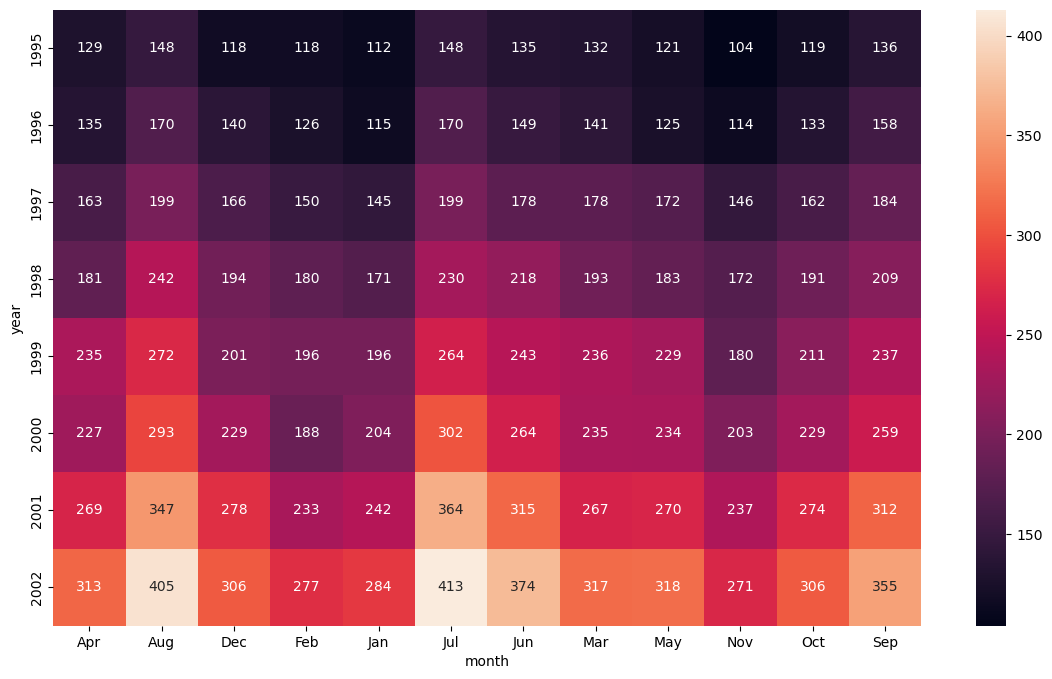

In [19]:
plt.figure(figsize=(14,8))
heatmap_y_month=pd.pivot_table(data=airline,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") # Here fmt is grid values
plt.show()

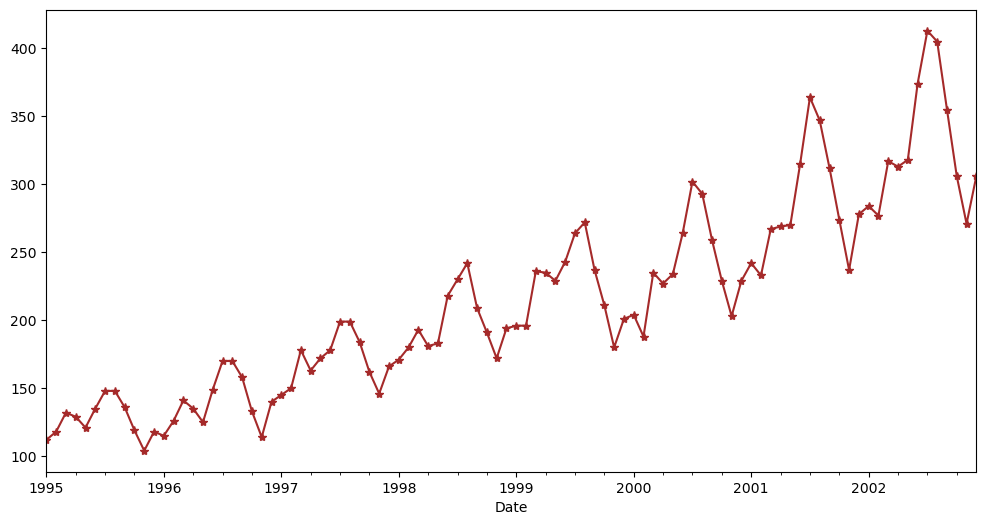

In [20]:
# Line Plot

airline_1["Passengers"].plot(figsize=(12,6),color="brown",marker="*")
plt.show()

<Axes: xlabel='year', ylabel='Passengers'>

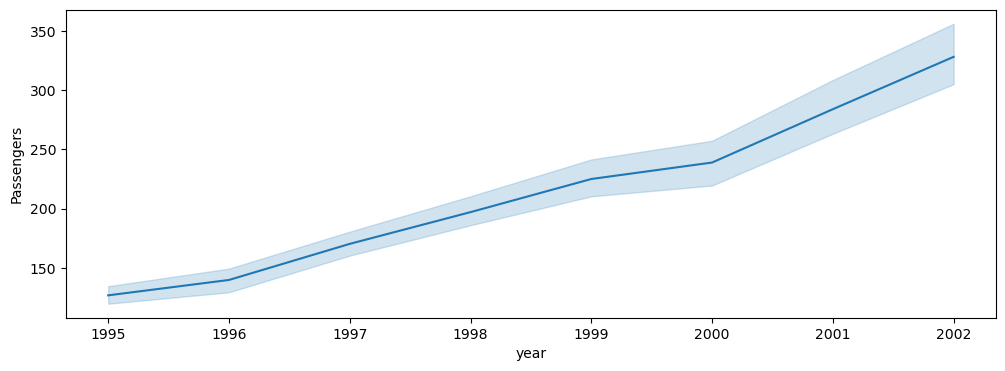

In [21]:
# Yearly Passenger Analysis

plt.figure(figsize=(12,4))
sns.lineplot(x="year",y="Passengers",data=airline)


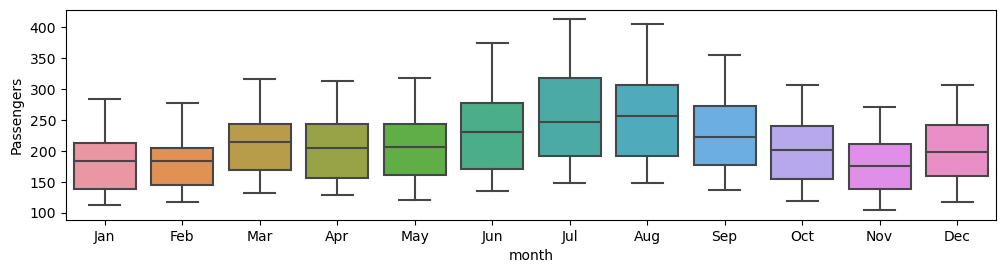

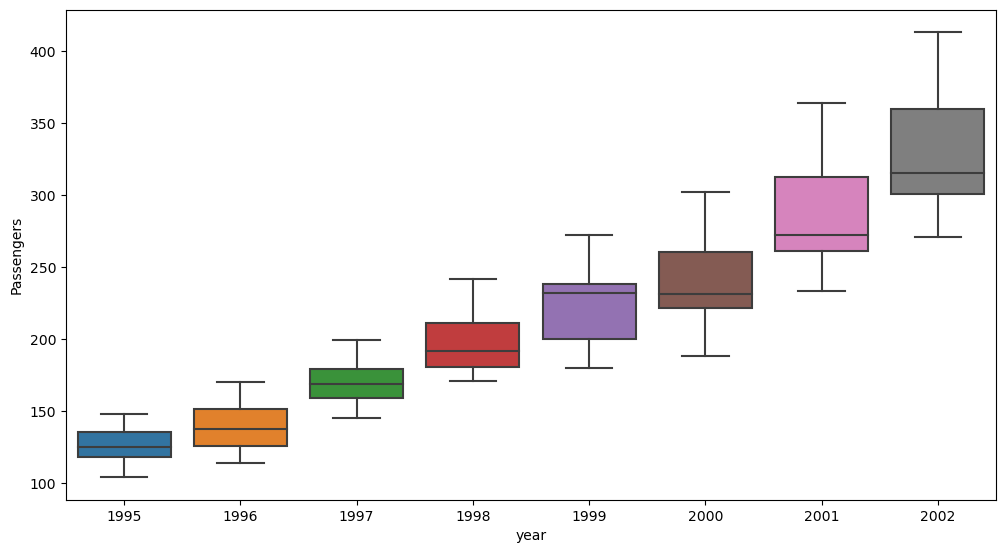

In [22]:
# Box Plot of Each Year by Monthly Intervals

plt.figure(figsize=(12,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airline)

plt.figure(figsize=(12,14))
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airline)
plt.show()

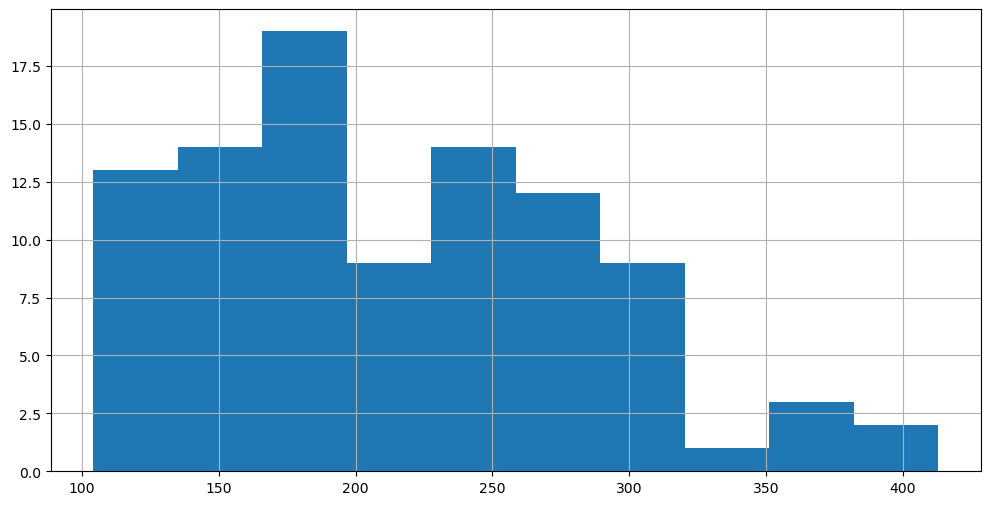

In [23]:
# Histogram Density plots

airline.Passengers.hist(figsize=(12,6))
plt.show()

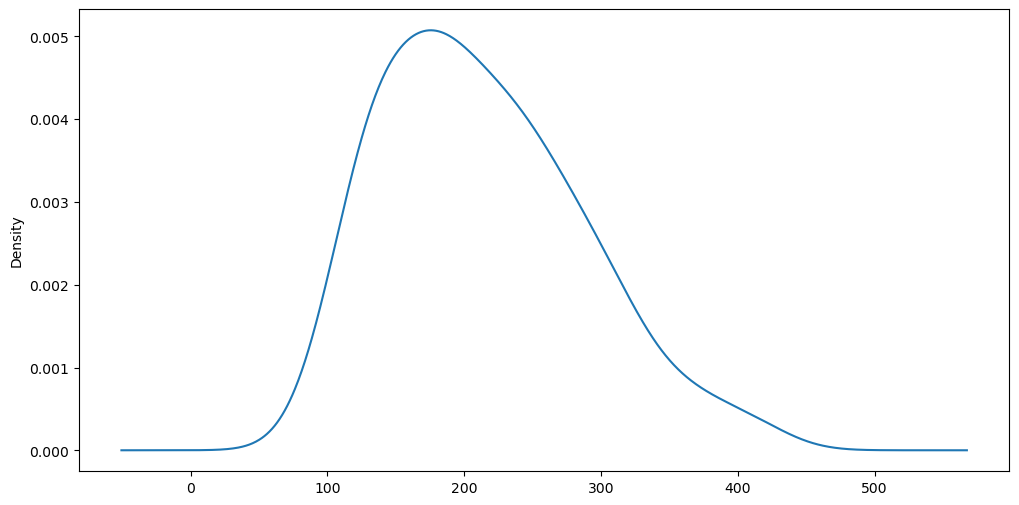

In [24]:
airline.Passengers.plot(kind="kde",figsize=(12,6))
plt.show()

#  Lag Plot

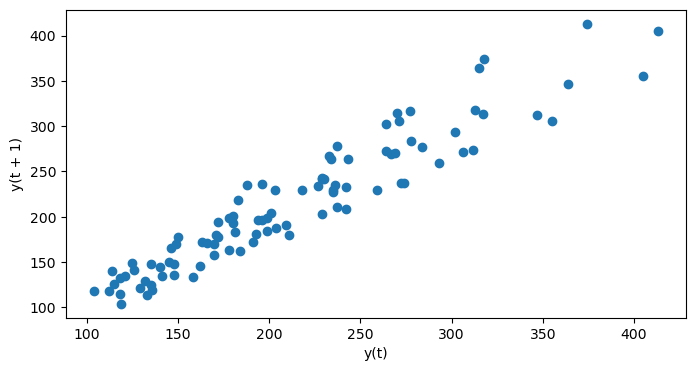

In [25]:
# Creating a Scatterplot 

plt.figure(figsize=(8,4))
for i in [1]:
    lag_plot(airline.Passengers,lag=1)
    plt.show()


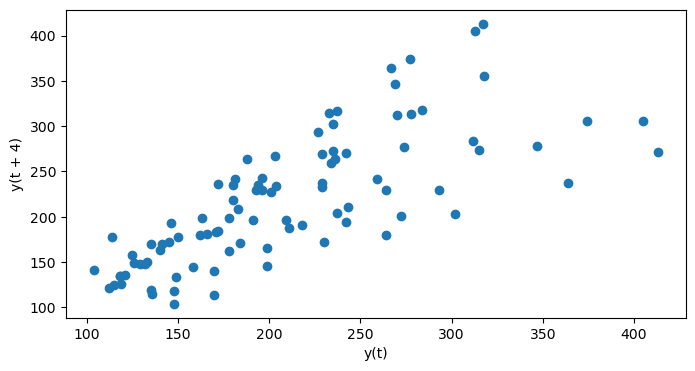

In [26]:
plt.figure(figsize=(8,4))
for i in [4]:
    lag_plot(airline.Passengers,lag=4)
    plt.show()


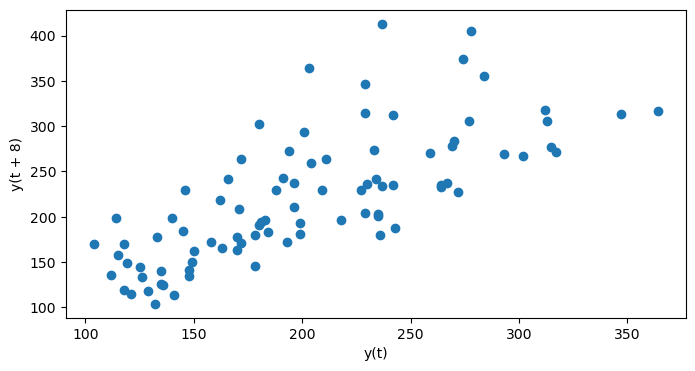

In [27]:
plt.figure(figsize=(8,4))
for i in [8]:
    lag_plot(airline.Passengers,lag=8)
    plt.show()


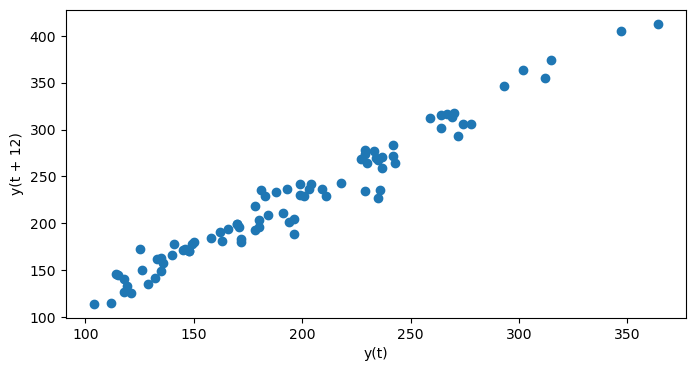

In [28]:
plt.figure(figsize=(8,4))
for i in [12]:
    lag_plot(airline.Passengers,lag=12)
    plt.show()


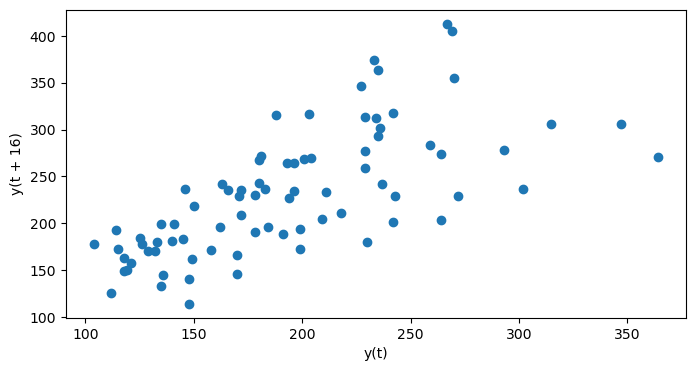

In [29]:
plt.figure(figsize=(8,4))
for i in [16]:
    lag_plot(airline.Passengers,lag=16)
    plt.show()


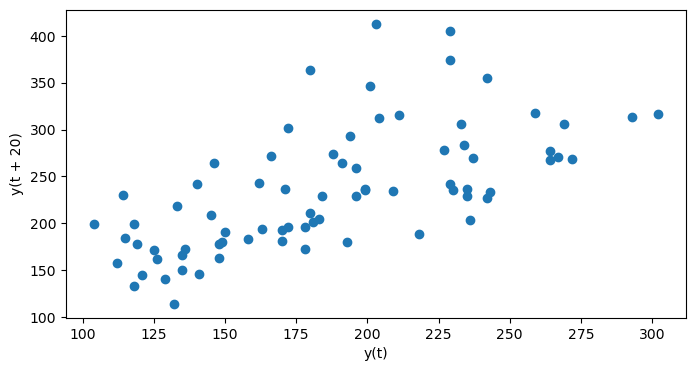

In [30]:
plt.figure(figsize=(8,4))
for i in [20]:
    lag_plot(airline.Passengers,lag=20)
    plt.show()


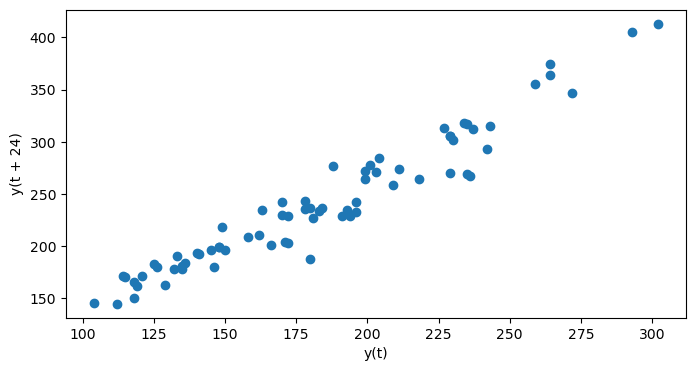

In [31]:
plt.figure(figsize=(8,4))
for i in [24]:
    lag_plot(airline.Passengers,lag=24)
    plt.show()


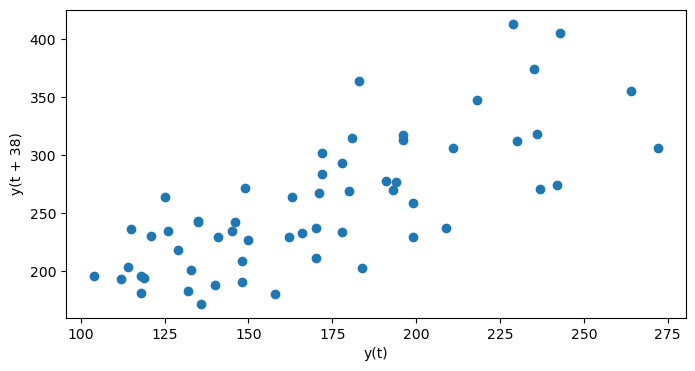

In [32]:
plt.figure(figsize=(8,4))
for i in [38]:
    lag_plot(airline.Passengers,lag=38)
    plt.show()


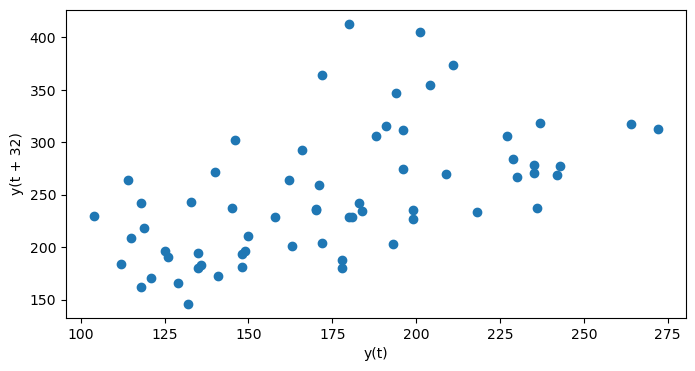

In [33]:
plt.figure(figsize=(8,4))
for i in [32]:
    lag_plot(airline.Passengers,lag=32)
    plt.show()


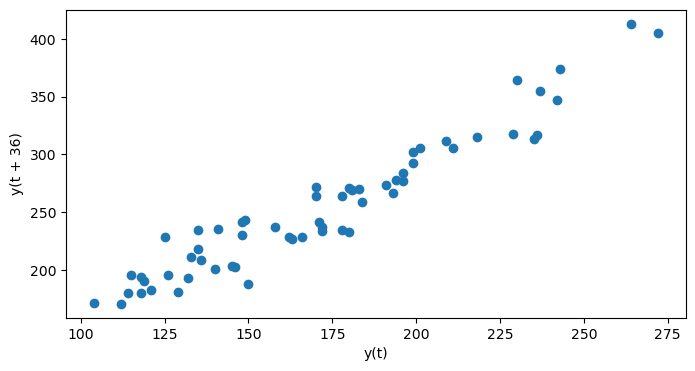

In [34]:
plt.figure(figsize=(8,4))
for i in [36]:
    lag_plot(airline.Passengers,lag=36)
    plt.show()


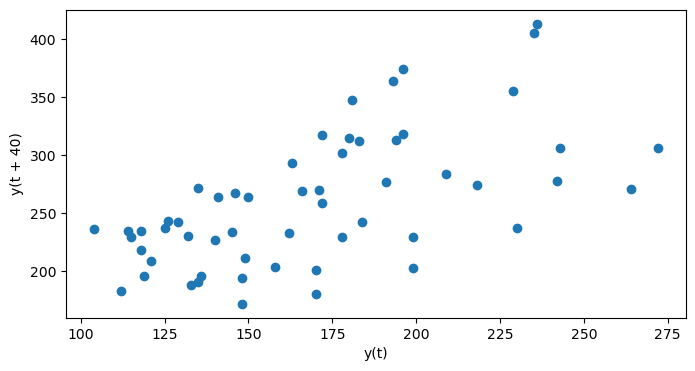

In [35]:
plt.figure(figsize=(8,4))
for i in [40]:
    lag_plot(airline.Passengers,lag=40)
    plt.show()


#  Moving Average

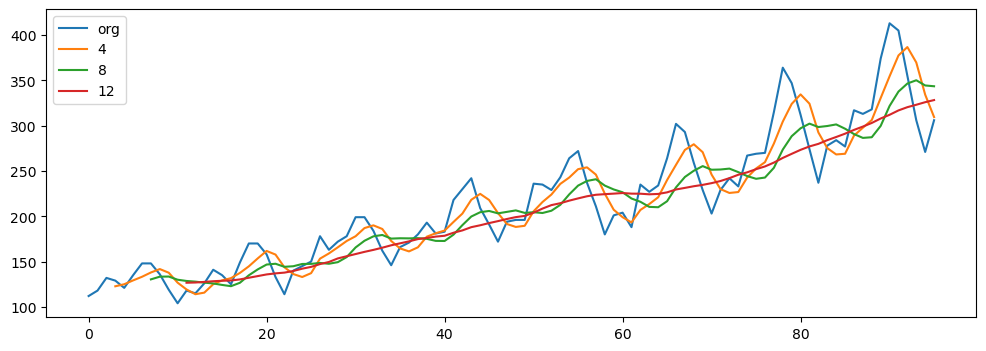

In [36]:
plt.figure(figsize=(12,4))
airline.Passengers.plot(label="org")
for i in range(4,13,4):
    airline["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")
plt.show()


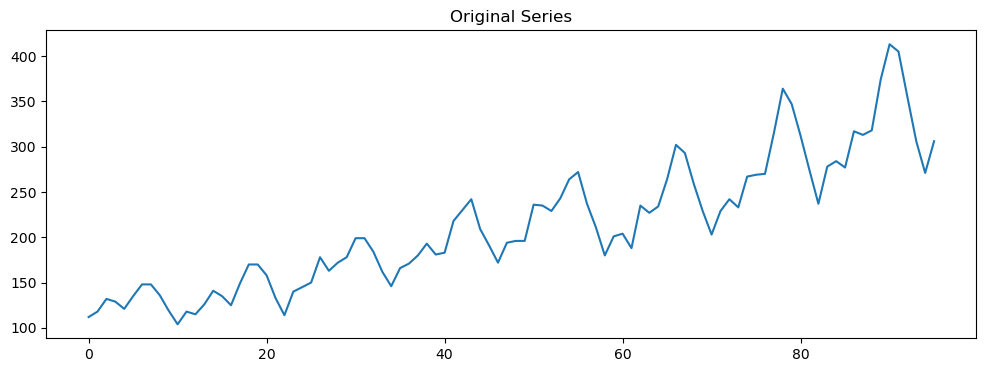

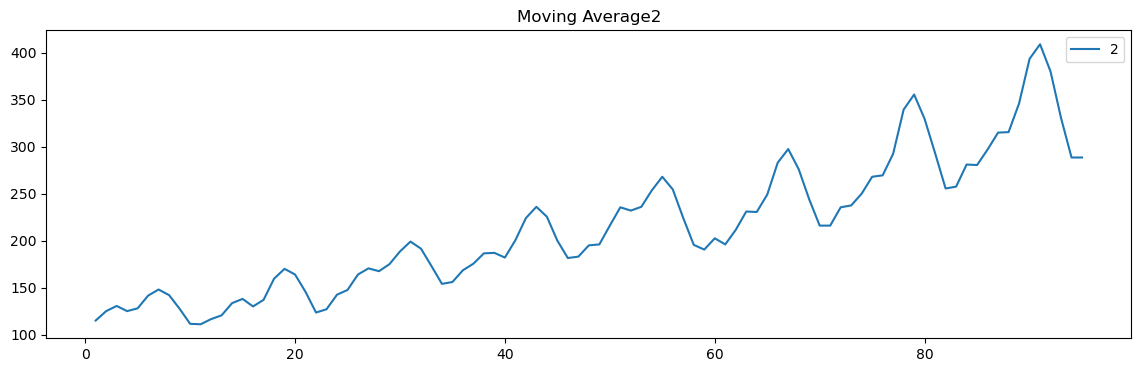

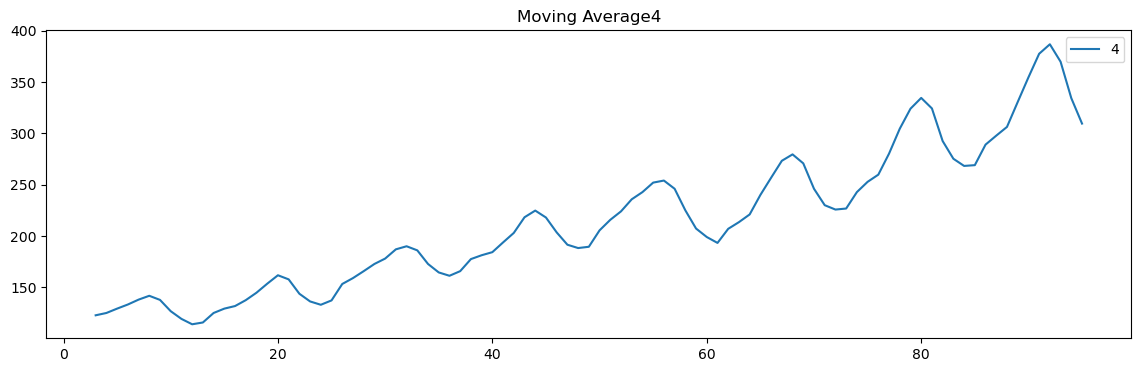

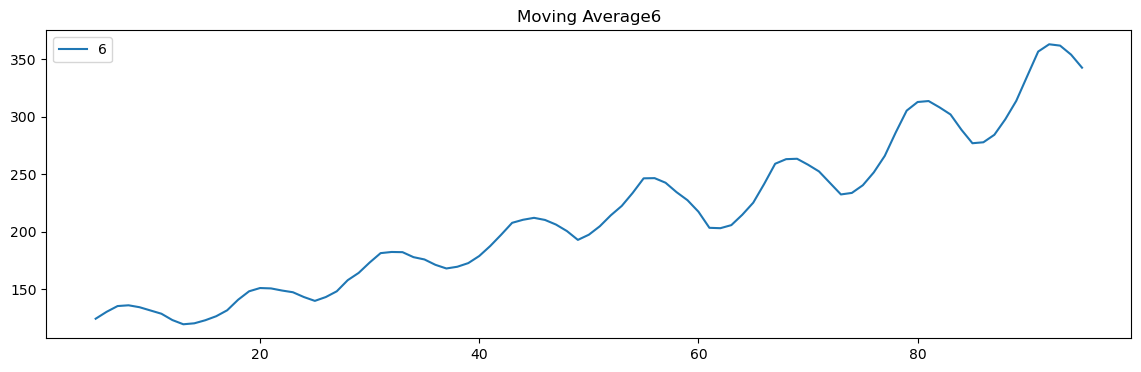

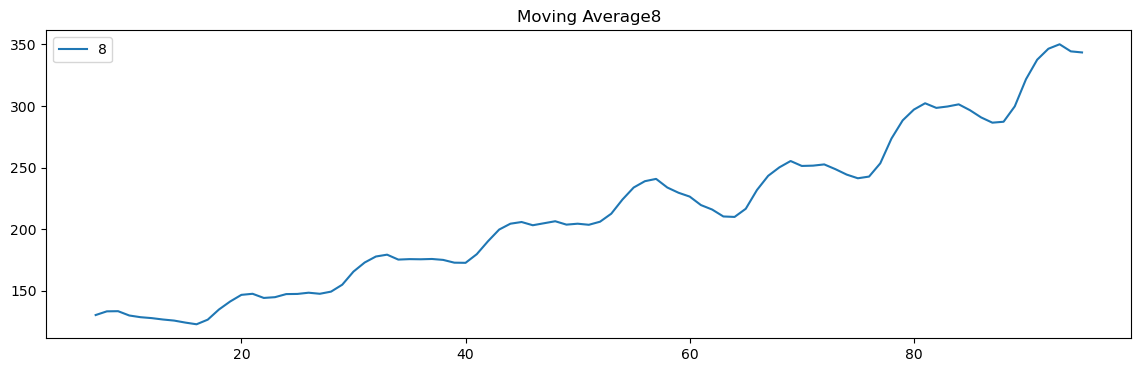

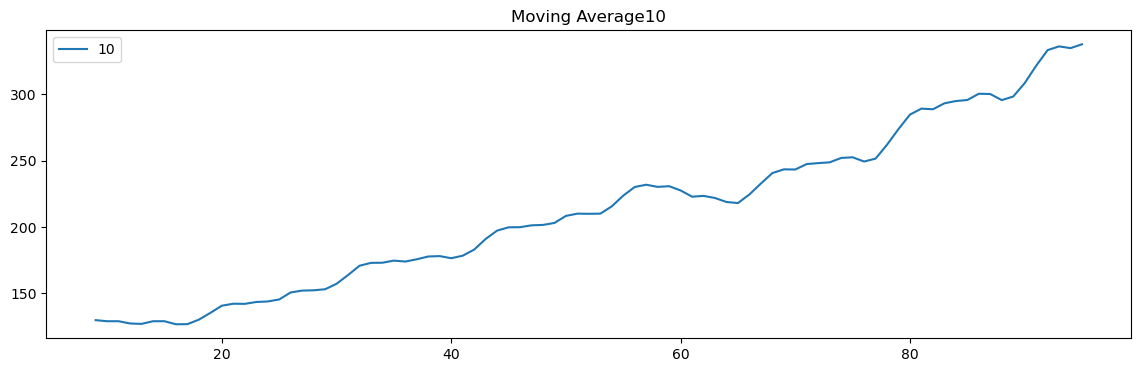

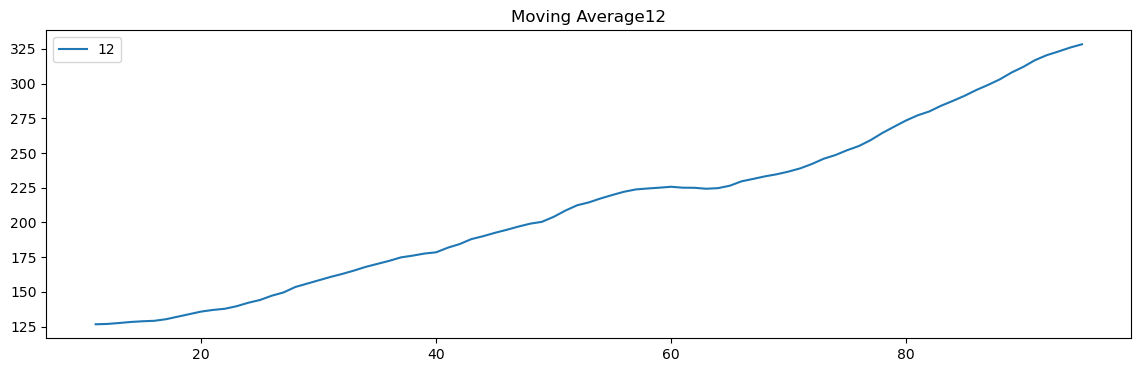

In [37]:

plt.figure(figsize=(12,4))
airline.Passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,13,2):
    plt.figure(figsize=(14,4))
    airline["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average"+str(i))
    plt.legend(loc="best")
    plt.show()

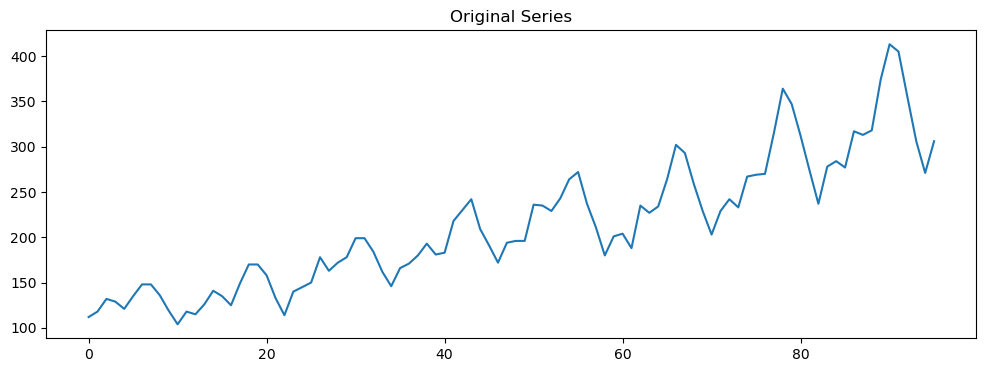

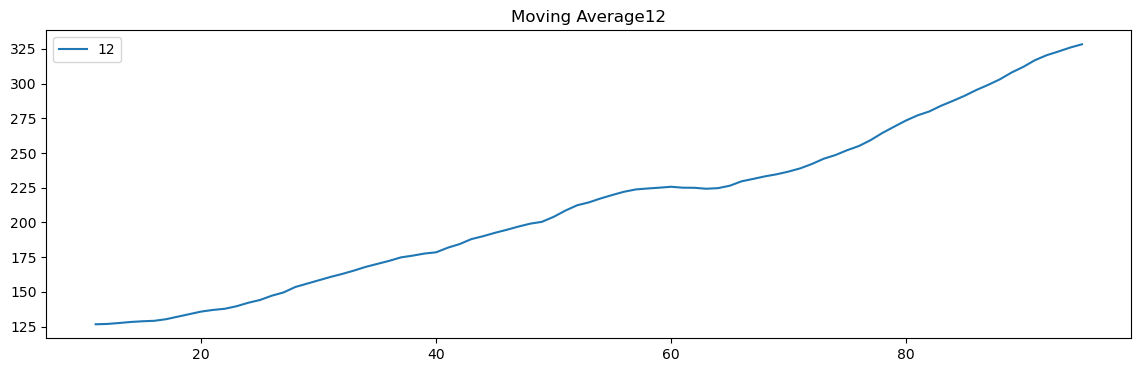

In [38]:

plt.figure(figsize=(12,4))
airline.Passengers.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(14,4))
airline["Passengers"].rolling(12).mean().plot(label=str(12))
plt.title("Moving Average" +str(12))
plt.legend(loc="best")
plt.show()

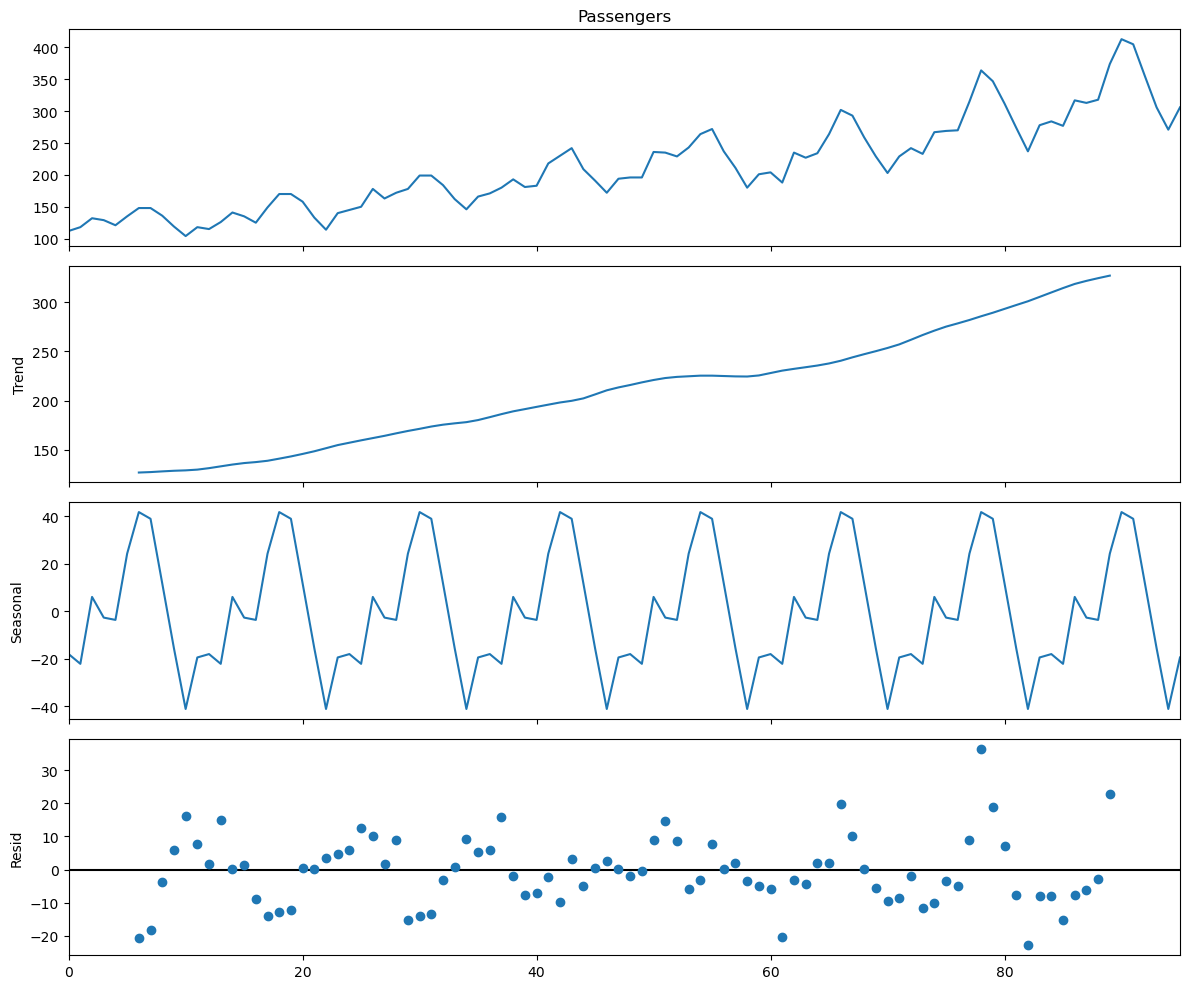

In [39]:
# Time series decomposition plot

decompose_ts_add=seasonal_decompose(airline.Passengers,period=12)
with plt.rc_context():
    plt.rc("figure",figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

# ACF & PACF Plots

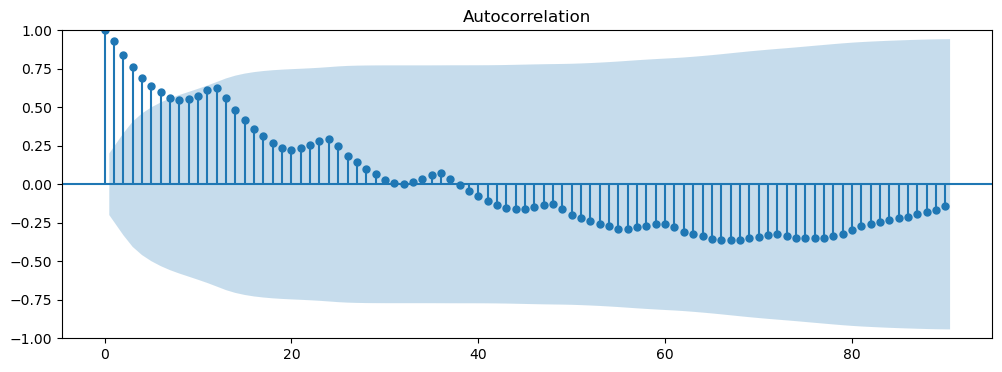

In [40]:
# Autocorrelation Function (ACF)

import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,4))
    tsa_plots.plot_acf(airline.Passengers,lags=90)
    plt.show()

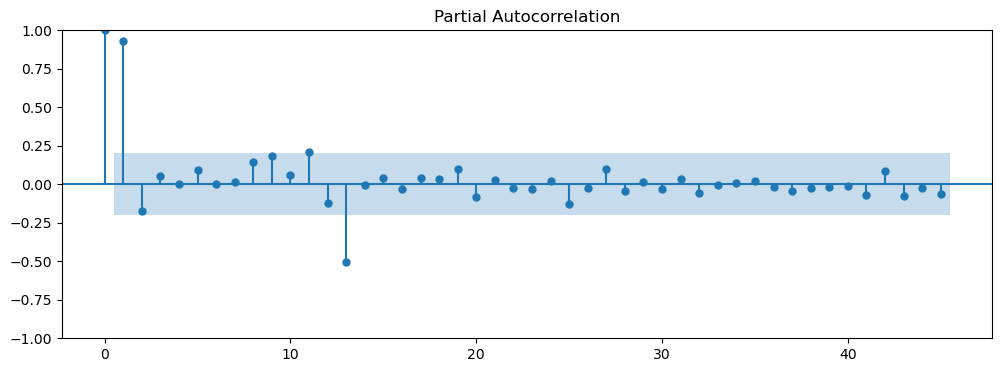

In [41]:
# Partial Autocorrelation Function (PACF)

import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(12,4))
    tsa_plots.plot_pacf(airline.Passengers,lags=45)
    plt.show()

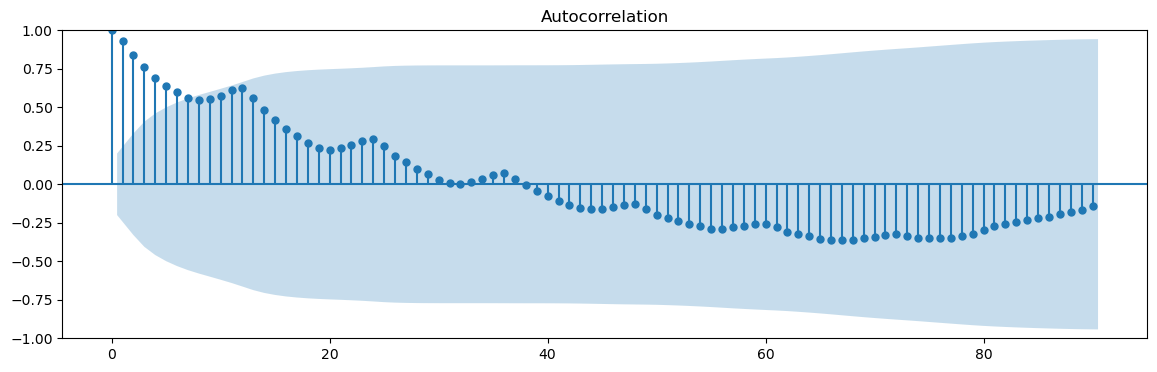

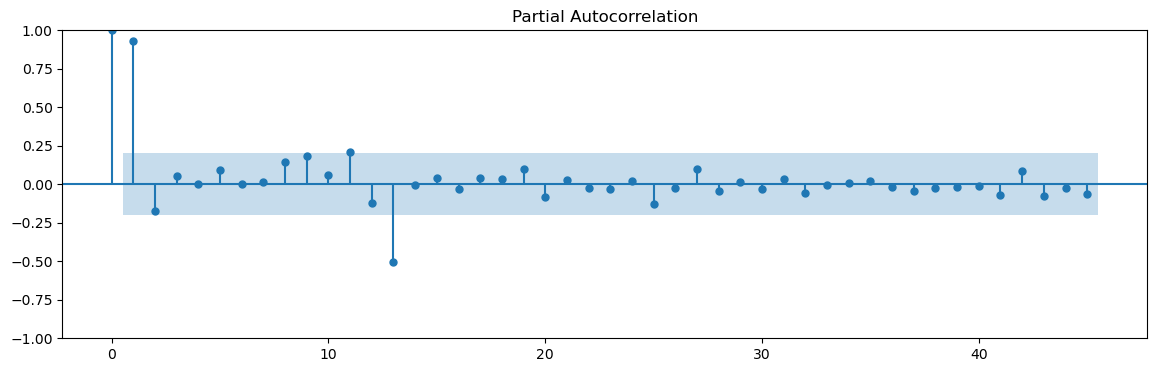

In [42]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(14,4))
    tsa_plots.plot_acf(airline.Passengers,lags=90)
    tsa_plots.plot_pacf(airline.Passengers,lags=45)
    plt.show()

In [43]:
visual=airline_1.copy()
visual.reset_index(inplace=True)
visual["date"]=pd.to_datetime(visual["Date"])
visual["year"]=visual["Date"].dt.year
visual["month"]=visual["Date"].dt.month
visual["week"]=visual["Date"].dt.week
visual["quarter"]=visual["Date"].dt.quarter
visual["day_of_week"]=visual["Date"].dt.day_name()
visual.drop("Date",axis=1,inplace=True)
visual.head(10)

,Passengers,date,year,month,week,quarter,day_of_week
0,112,1995-01-01,1995,1,52,1,Sunday
1,118,1995-02-01,1995,2,5,1,Wednesday
2,132,1995-03-01,1995,3,9,1,Wednesday
3,129,1995-04-01,1995,4,13,2,Saturday
4,121,1995-05-01,1995,5,18,2,Monday
5,135,1995-06-01,1995,6,22,2,Thursday
6,148,1995-07-01,1995,7,26,3,Saturday
7,148,1995-08-01,1995,8,31,3,Tuesday
8,136,1995-09-01,1995,9,35,3,Friday
9,119,1995-10-01,1995,10,39,4,Sunday


In [44]:
visual.year.unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002], dtype=int64)

# Time Series Decomposition
# 1. Seasonality
# 2. Trend
# Additive Seasonal Decomposition

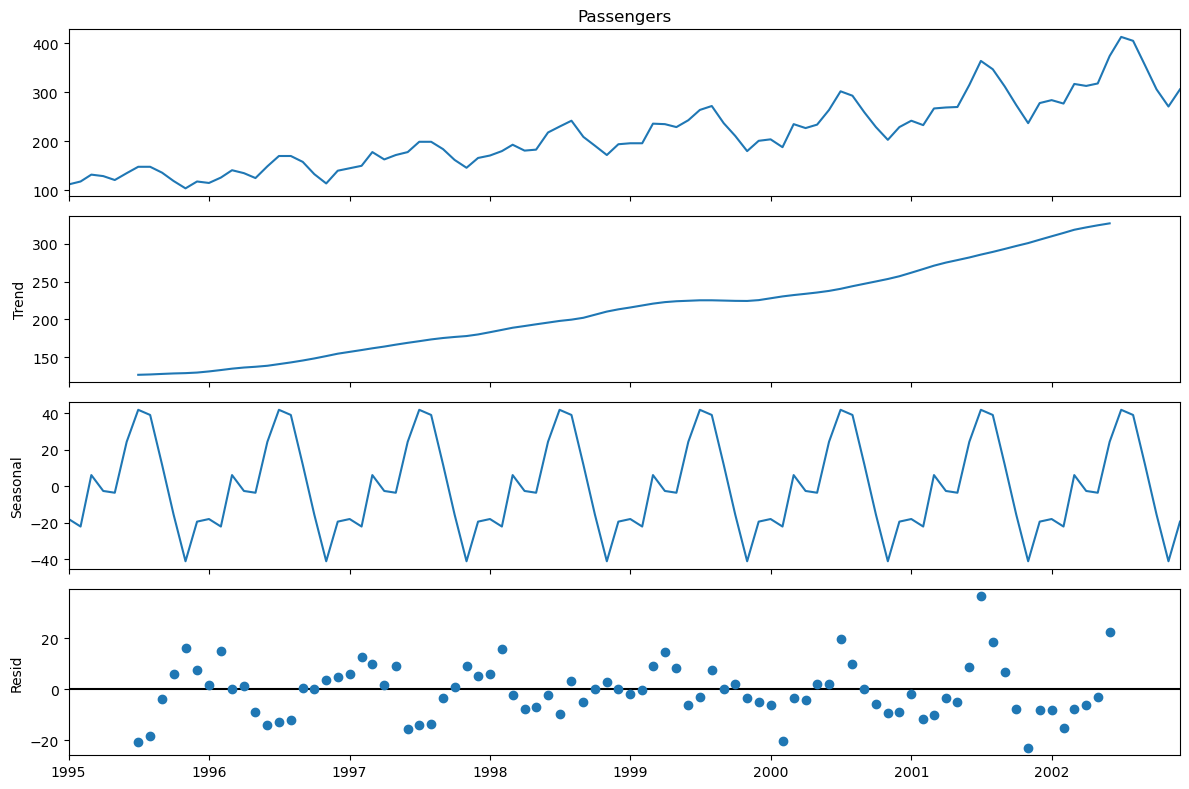

In [45]:
decompose_ts_add=seasonal_decompose(airline_1.Passengers,period=12,model="additive")
with plt.rc_context():
    plt.rc("figure",figsize=(12,8))
    decompose_ts_add.plot()
    plt.show()

#  Multiplicative Seasonal Decomposition


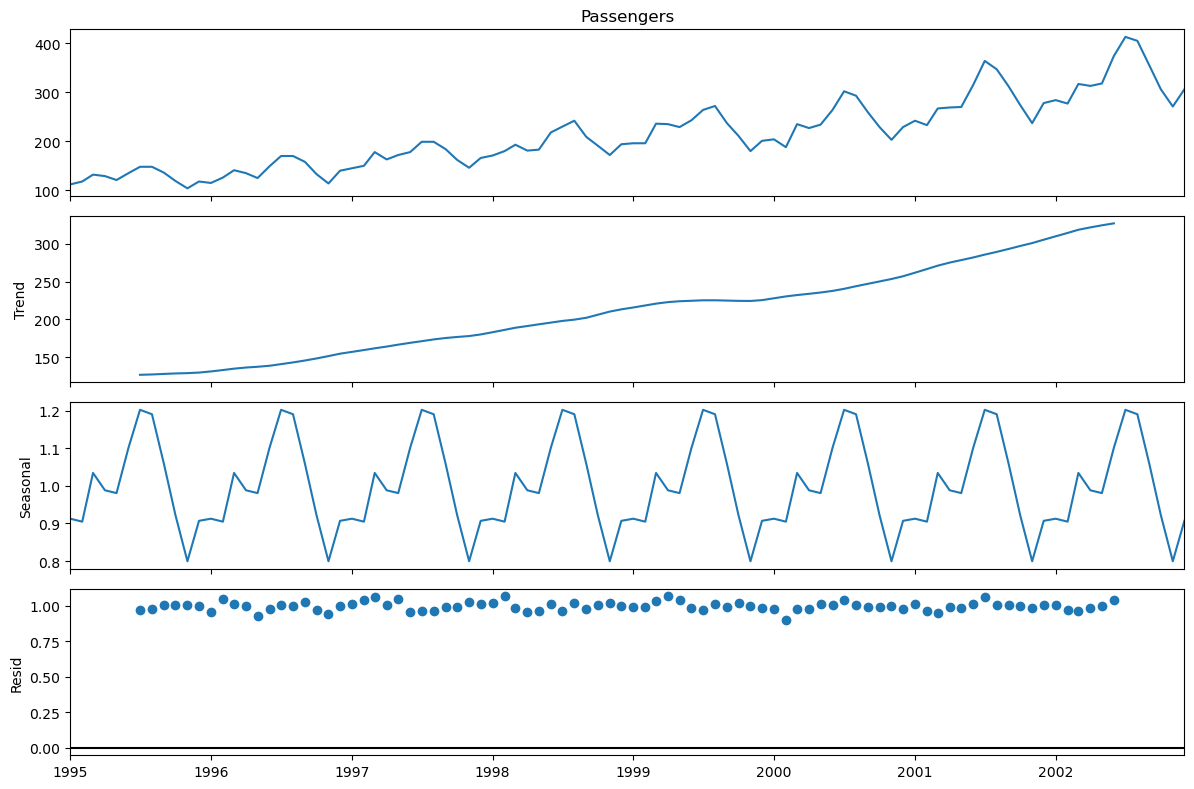

In [46]:
decompose_mts_add=seasonal_decompose(airline_1.Passengers,period=12,model="multiplicative")
with plt.rc_context():
    plt.rc("figure",figsize=(12,8))
    decompose_mts_add.plot()
    plt.show()

In [47]:
# Splitting the train and test data

size=72
train_data=airline_1[:size]
test_data=airline_1[size:]

In [48]:
train_data

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2000-08-01,293
2000-09-01,259
2000-10-01,229


In [49]:
test_data

,Passengers
Date,
2001-01-01,242
2001-02-01,233
2001-03-01,267
2001-04-01,269
2001-05-01,270
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312


In [50]:
print("Train:",train_data.index.min(),train_data.index.max(),"\n",
"Test:",test_data.index.min(),test_data.index.max())

Train: 1995-01-01 00:00:00 2000-12-01 00:00:00 
 Test: 2001-01-01 00:00:00 2002-12-01 00:00:00


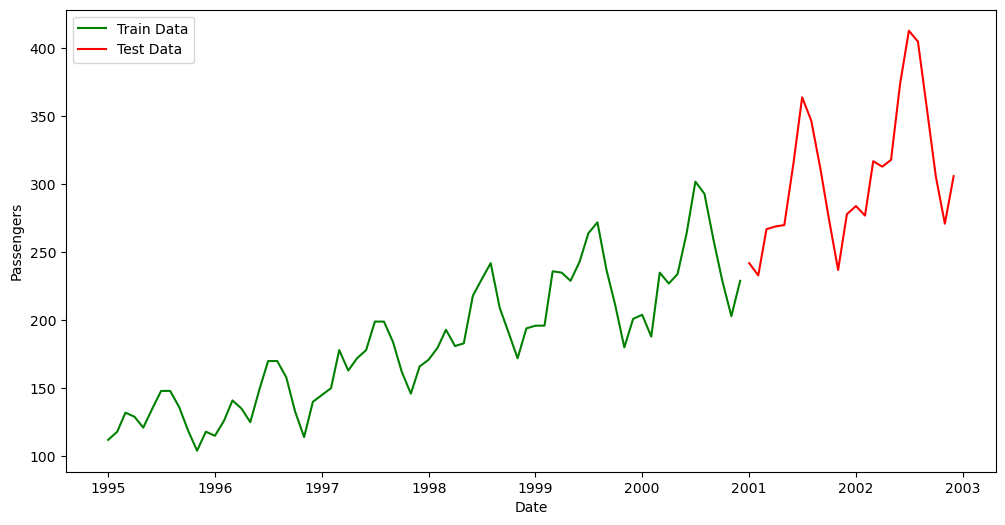

In [51]:
plt.figure(figsize=(12,6))
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.plot(train_data,"green",label="Train Data")
plt.plot(test_data,"red",label="Test Data")
plt.legend()
plt.show()

#  Evaluation Metric MAPE

In [52]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

#  Exponential Methods

In [53]:
ses_model=SimpleExpSmoothing(train_data["Passengers"]).fit(optimized=True)
test_pred_ses=ses_model.forecast(24)
train_pred_ses=ses_model.fittedvalues
test_rmse_ses=sqrt(mean_squared_error(test_pred_ses,test_data.Passengers))
train_rmse_ses=sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses=MAPE(test_pred_ses,test_data.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 23.38228335004472 
 Train Root Mean Squared Error = 19.031771730910982 
 Test Root Mean Squared Error  = 91.11325402904403


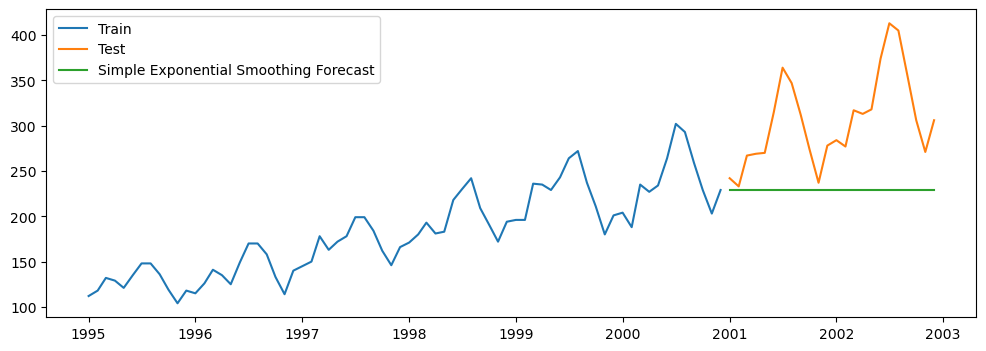

In [54]:
plt.figure(figsize=(12,4))
plt.plot(train_data,label="Train")
plt.plot(test_data,label="Test")
plt.plot(test_pred_ses,label="Simple Exponential Smoothing Forecast")
plt.legend(loc="best")
plt.show()


#  Holt method (Double Exponential)


In [55]:
holt_model=Holt(train_data).fit(optimized=True)
test_pred_holt=holt_model.forecast(24)
train_pred_holt=holt_model.fittedvalues
test_rmse_holt=sqrt(mean_squared_error(test_pred_holt,test_data.Passengers))
train_rmse_holt=sqrt(mean_squared_error(train_pred_holt,train_data))
mape_holt=MAPE(test_pred_holt,test_data.Passengers)
print("Simple Exponential Method Evaluation","\n",\
     "Mean Absolute Percent Error ={}".format(mape_holt),"\n",\
     "Train Root Mean Squared Error ={}".format(train_rmse_holt),"\n",
     "Test Root MeanSquared Error ={}".format(test_rmse_holt))


Simple Exponential Method Evaluation 
 Mean Absolute Percent Error =13.785533696070189 
 Train Root Mean Squared Error =19.30227351085801 
 Test Root MeanSquared Error =59.95241168899304


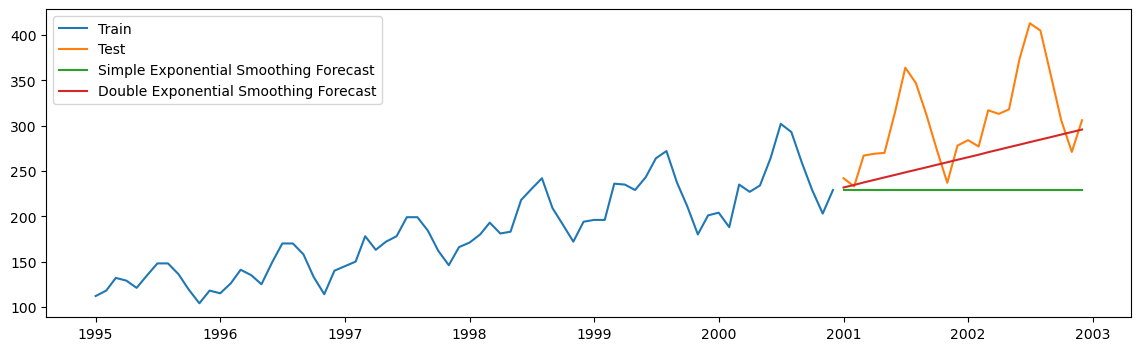

In [56]:
plt.figure(figsize=(14,4))
plt.plot(train_data,label="Train")
plt.plot(test_data,label="Test")
plt.plot(test_pred_ses,label="Simple Exponential Smoothing Forecast")
plt.plot(test_pred_holt,label="Double Exponential Smoothing Forecast")
plt.legend(loc="best")
plt.show()

#  Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)


In [57]:
holt_tre_model=ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_tre_holt=holt_tre_model.forecast(24)
train_pred_tre_holt=holt_tre_model.fittedvalues
test_rmse_trex_holt=sqrt(mean_squared_error(test_pred_tre_holt,test_data.Passengers))
train_rmse_trex_holt=sqrt(mean_squared_error(train_pred_tre_holt,train_data))
mape_trex_holt=MAPE(test_pred_tre_holt,test_data.Passengers)
print("Triple Exponential With Additive Trend & Seasonality Method Evaluation","\n",\
     "Mean Absolute Percent Error ={}".format(mape_trex_holt),"\n",\
     "Train Root Mean Squared Error ={}".format(train_rmse_trex_holt),"\n",
     "Test Root Mean Squared Error = {}".format(test_rmse_trex_holt))


Triple Exponential With Additive Trend & Seasonality Method Evaluation 
 Mean Absolute Percent Error =12.084990921893924 
 Train Root Mean Squared Error =7.751303515985584 
 Test Root Mean Squared Error = 47.57079569932803


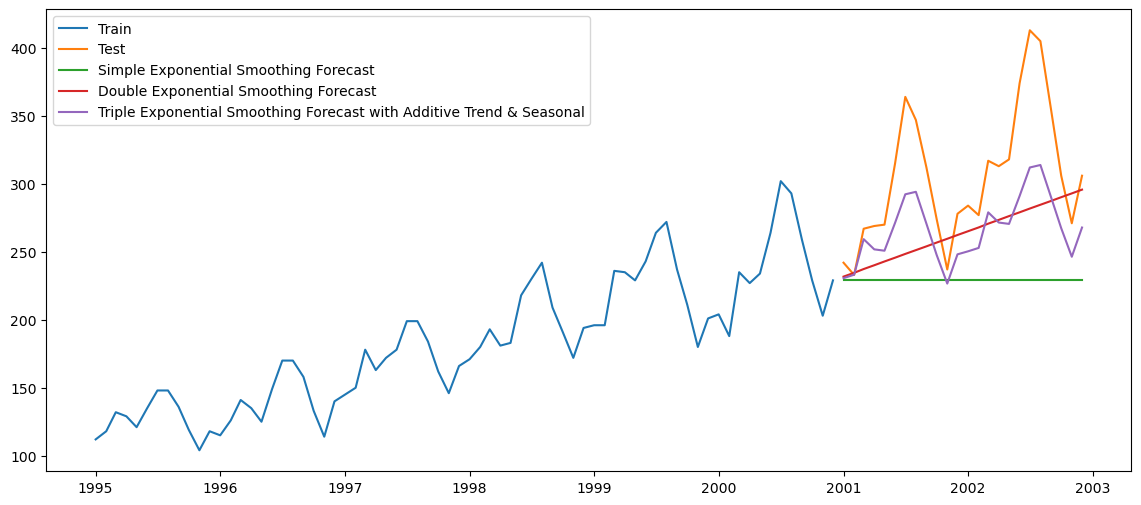

In [58]:
plt.figure(figsize=(14,6))
plt.plot(train_data,label="Train")
plt.plot(test_data,label="Test")
plt.plot(test_pred_ses,label="Simple Exponential Smoothing Forecast")
plt.plot(test_pred_holt,label="Double Exponential Smoothing Forecast")
plt.plot(test_pred_tre_holt,label="Triple Exponential Smoothing Forecast with Additive Trend & Seasonal")
plt.legend(loc="best")
plt.show()



#  Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

In [59]:

holt_mul_add_model=ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_add_holt=holt_mul_add_model.forecast(24)
train_pred_mul_add_holt=holt_mul_add_model.fittedvalues
test_rmse_mul_add_holt=sqrt(mean_squared_error(test_pred_mul_add_holt,test_data.Passengers))
train_rmse_mul_add_holt=sqrt(mean_squared_error(train_pred_mul_add_holt,train_data))
mape_mul_add_holt=MAPE(test_pred_mul_add_holt,test_data.Passengers)
print("Triple Exponential Method with Multiplicative Seasonality & Additive Trend","\n",\
     "Mean Absolute Percent Error  ={}".format(mape_mul_add_holt),"\n",\
     "Train Root Mean Squared Error ={}".format(train_rmse_mul_add_holt),"\n",
     "Test Root Mean Squared Error={}".format(test_rmse_mul_add_holt))


Triple Exponential Method with Multiplicative Seasonality & Additive Trend 
 Mean Absolute Percent Error  =9.368335182173567 
 Train Root Mean Squared Error =6.386634537462404 
 Test Root Mean Squared Error=34.989294364735954


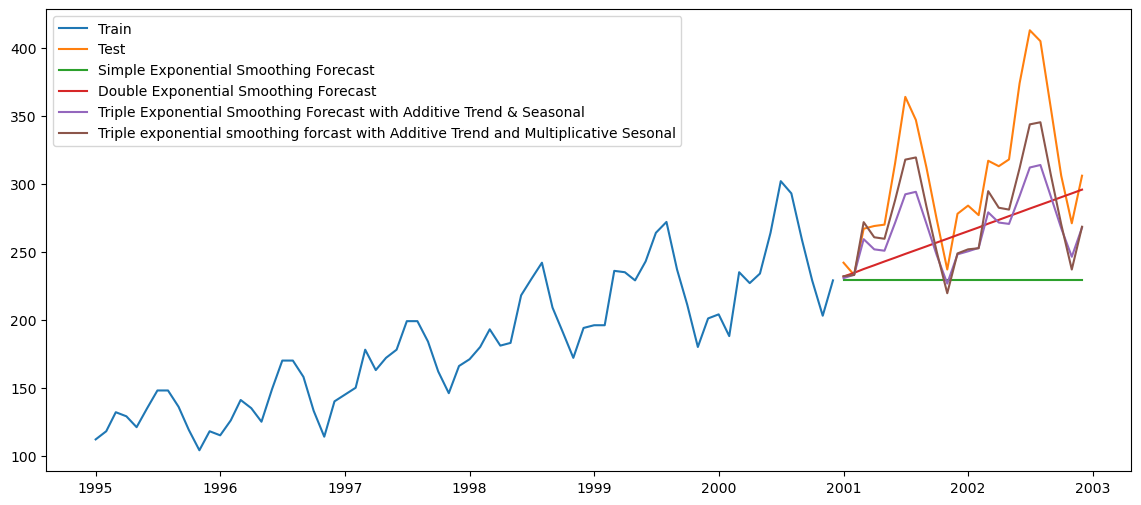

In [60]:

plt.figure(figsize=(14,6))
plt.plot(train_data,label="Train")
plt.plot(test_data,label="Test")
plt.plot(test_pred_ses,label="Simple Exponential Smoothing Forecast")
plt.plot(test_pred_holt,label="Double Exponential Smoothing Forecast")
plt.plot(test_pred_tre_holt,label="Triple Exponential Smoothing Forecast with Additive Trend & Seasonal")
plt.plot(test_pred_mul_add_holt,label="Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal")
plt.legend(loc="best")
plt.show()

# Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)


In [61]:
holtre_add_mul_model=ExponentialSmoothing(train_data,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1,
                                                                                                        smoothing_slope=0.5)
test_pred_add_mul_holtre=holtre_add_mul_model.forecast(24)
train_pred_add_mul_holtre=holtre_add_mul_model.fittedvalues
test_rmse_add_mul_holtre=sqrt(mean_squared_error(test_pred_add_mul_holtre,test_data.Passengers))
train_rmse_add_mul_holtre=sqrt(mean_squared_error(train_pred_add_mul_holtre,train_data))
mape_add_mul_holtre=MAPE(test_pred_add_mul_holtre,test_data.Passengers)
print("Triple Exponential Method with Additive Seasonality and Multiplicative Trend","\n",\
     "Mean Absolute Percent Error ={}".format(mape_add_mul_holtre),"\n",\
     "TrainRoot Mean Squared Error={}".format(train_rmse_add_mul_holtre),"\n",
     "Test Root Mean Squared Error={}".format(test_rmse_add_mul_holtre))


Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error =13.662161783612538 
 TrainRoot Mean Squared Error=12.760619317929557 
 Test Root Mean Squared Error=49.609866370939734


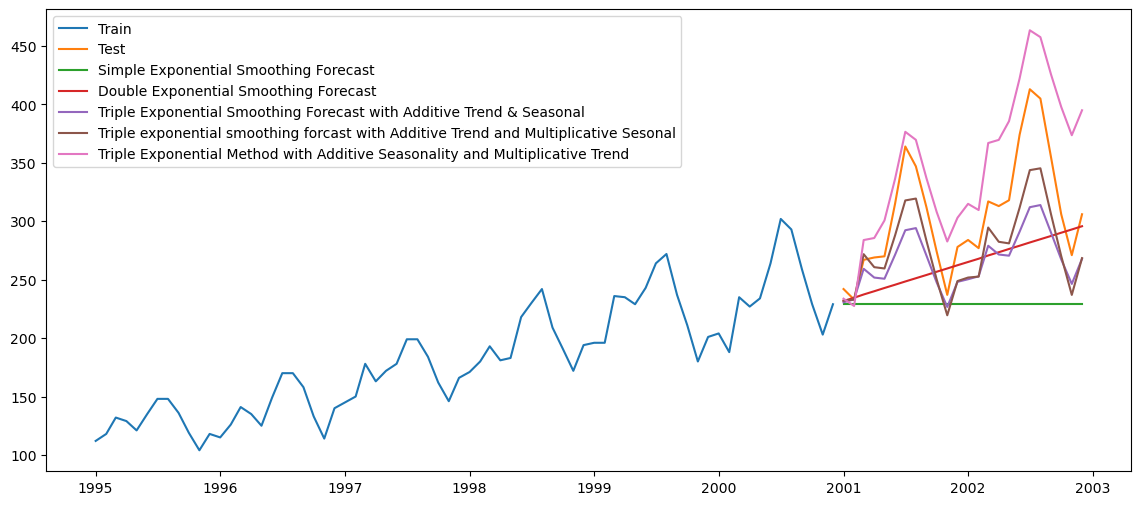

In [62]:
plt.figure(figsize=(14,6))
plt.plot(train_data,label="Train")
plt.plot(test_data,label="Test")
plt.plot(test_pred_ses,label="Simple Exponential Smoothing Forecast")
plt.plot(test_pred_holt,label="Double Exponential Smoothing Forecast")
plt.plot(test_pred_tre_holt,label="Triple Exponential Smoothing Forecast with Additive Trend & Seasonal")
plt.plot(test_pred_mul_add_holt,label="Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal")
plt.plot(test_pred_add_mul_holtre,label="Triple Exponential Method with Additive Seasonality and Multiplicative Trend")
plt.legend(loc="best")
plt.show()

#  Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)

In [63]:
holt_multre_model=ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_multre_holt=holt_multre_model.forecast(24)
train_pred_multre_holt=holt_multre_model.fittedvalues
test_rmse_multre_holt=sqrt(mean_squared_error(test_pred_multre_holt,test_data.Passengers))
train_rmse_multre_holt=sqrt(mean_squared_error(train_pred_multre_holt,train_data))
mape_multre_holt=MAPE(test_pred_multre_holt,test_data.Passengers)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_multre_holt ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_multre_holt ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_multre_holt ))


Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error   = 6.03504677750598 
 Train Root Mean Squared Error = 6.396749787240455 
 Test Root Mean Squared Error  = 23.058733311909588


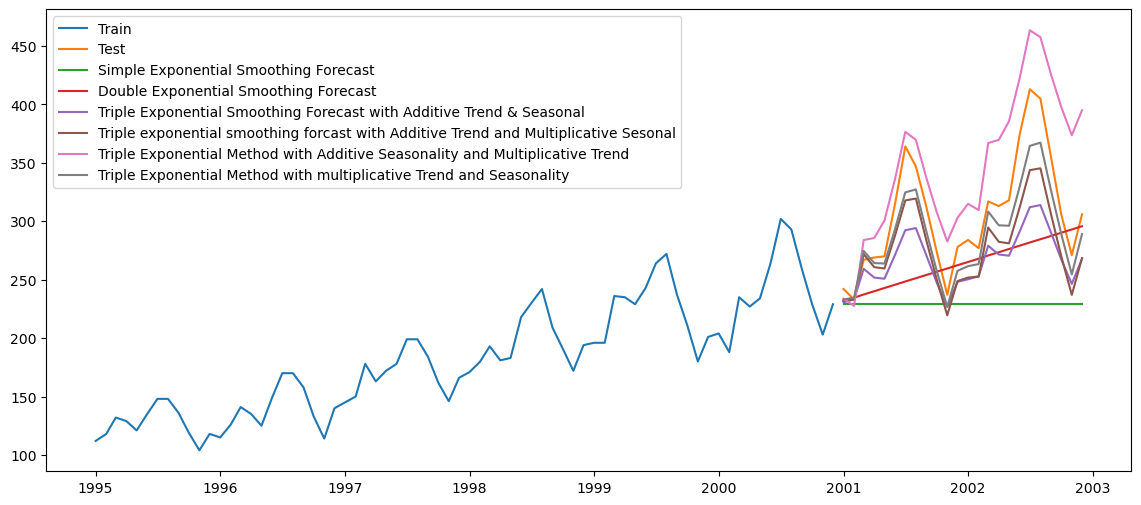

In [64]:

plt.figure(figsize=(14,6))
plt.plot(train_data,label="Train")
plt.plot(test_data,label="Test")
plt.plot(test_pred_ses,label="Simple Exponential Smoothing Forecast")
plt.plot(test_pred_holt,label="Double Exponential Smoothing Forecast")
plt.plot(test_pred_tre_holt,label="Triple Exponential Smoothing Forecast with Additive Trend & Seasonal")
plt.plot(test_pred_mul_add_holt,label="Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal")
plt.plot(test_pred_add_mul_holtre,label="Triple Exponential Method with Additive Seasonality and Multiplicative Trend")
plt.plot(test_pred_multre_holt,label="Triple Exponential Method with multiplicative Trend and Seasonality")
plt.legend(loc="best")
plt.show()

#  Comparing the Results

In [65]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul"]),
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_holt,train_rmse_trex_holt,train_rmse_mul_add_holt,train_rmse_add_mul_holtre,train_rmse_multre_holt]),
        "Test_MAPE(%)":pd.Series([mape_ses,mape_holt,mape_trex_holt,mape_mul_add_holt,mape_add_mul_holtre,mape_multre_holt]),
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_holt,test_rmse_trex_holt,test_rmse_mul_add_holt,test_rmse_add_mul_holtre,test_rmse_multre_holt])}    
              
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(["Test_MAPE(%)"],inplace=True,ignore_index=True)
table_evaluation

              
              
              
              

,Models,Train_RMSE,Test_MAPE(%),Test_RMSE_Values
0,Triple_Exp_Mul,6.396750,6.035047,23.058733
1,Triple_Exp_Mul_Add,6.386635,9.368335,34.989294
2,Triple_Exp_Add,7.751304,12.084991,47.570796
3,Triple_Exp_Add_Mul,12.760619,13.662162,49.609866
4,Double_Exp,19.302274,13.785534,59.952412
5,Simple_Exp,19.031772,23.382283,91.113254


# Visualising Model Performance

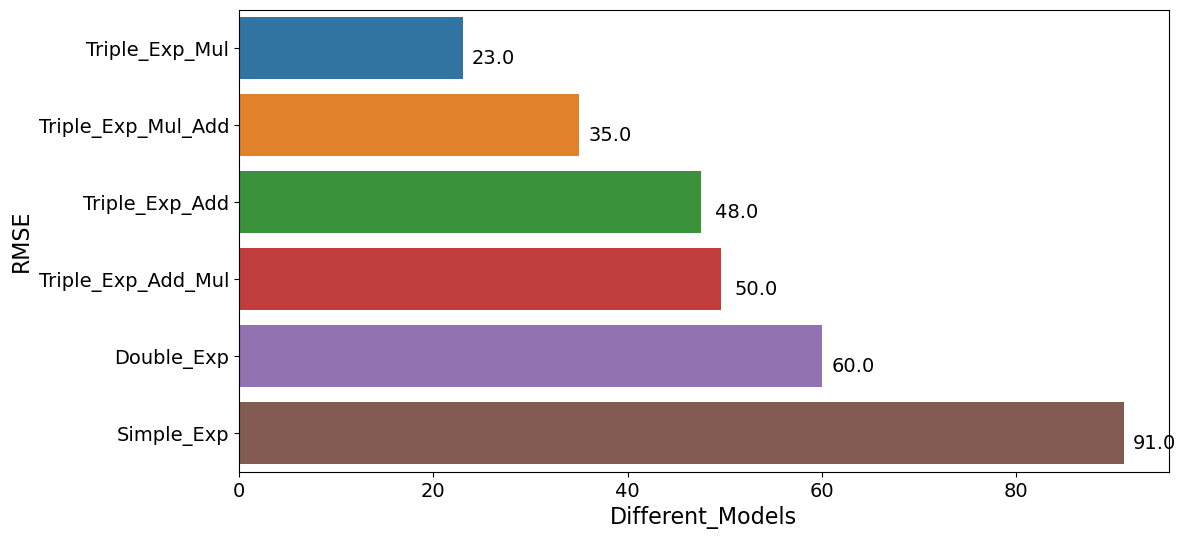

In [66]:
f,axe=plt.subplots(1,1,figsize=(12,6))
sns.barplot(x="Test_RMSE_Values",y="Models",data=table_evaluation,ax=axe)
axe.set_xlabel("Different_Models",size=16)
axe.set_ylabel("RMSE",size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 1, i + .20, str(v),
            color = 'black', fontsize= 14)
plt.show()


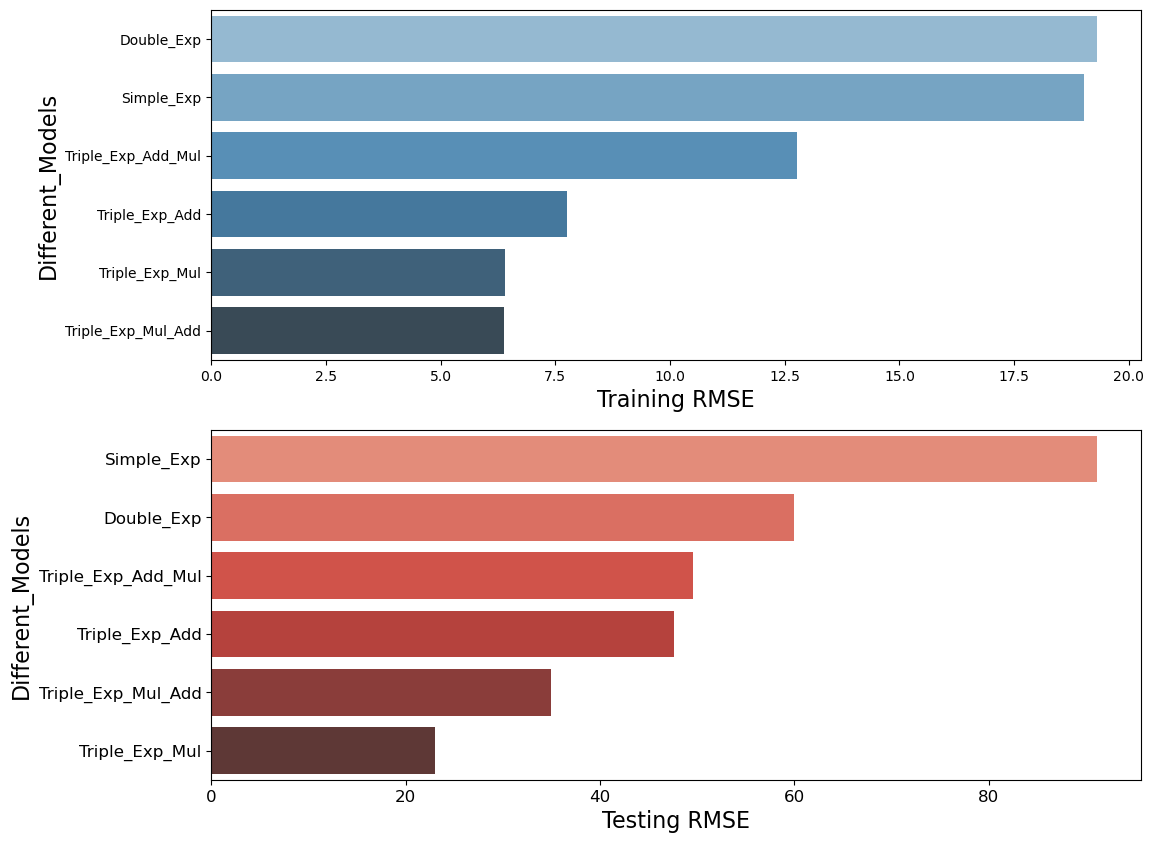

In [67]:
f, axes = plt.subplots(2,1, figsize=(12,10))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

train_rmse = table_evaluation.sort_values(by=['Train_RMSE'], ascending=False)

sns.barplot(x='Train_RMSE', y='Models', data = train_rmse, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training RMSE', size=16)
axes[0].set_ylabel('Different_Models', size=16)

test_rmse = table_evaluation.sort_values(by=['Test_RMSE_Values'], ascending=False)

sns.barplot(x='Test_RMSE_Values', y='Models', data = test_rmse, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Testing RMSE', size=16)
axes[1].set_ylabel('Different_Models', size=16)

plt.show()

#  Autoregressive Integrated Moving Averages (ARIMA)


In [68]:
   
def test_stationarity(timeseries):
    
    # Determine rolling statistics
    
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    original=plt.plot(timeseries,color="blue",label="Original")
    mean=plt.plot(movingAverage,color="red",label="Rolling Mean")
    plt.legend(loc="best")
    plt.show(block=False)
    
    # Perform Dickey-Fuller test
    
    print("Resukts if Dickey Fuller Test:")
    dftest=adfuller(timeseries["Passengers"],autolag="AIC")
    dfoutput=pd.Series(dftest[0:4],index=["Test Statistic","p-value","# Lags Used","Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value(%s)"%key]=value
    print(dfoutput)

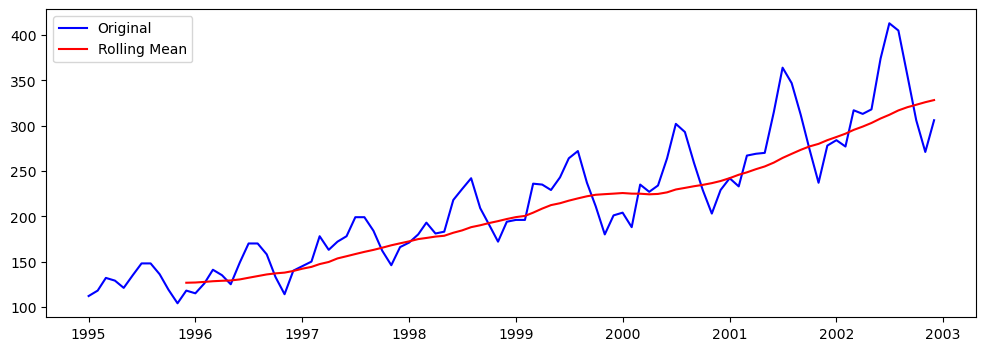

Resukts if Dickey Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
# Lags Used                    12.000000
Number of Observations Used    83.000000
Critical Value(1%)             -3.511712
Critical Value(5%)             -2.897048
Critical Value(10%)            -2.585713
dtype: float64


In [69]:
plt.figure(figsize=(12,4))
sales= pd.DataFrame()
sales['Passengers'] = airline_1[['Passengers']]
test_stationarity(sales)

In [70]:

def adf_test(series):
    result=adfuller(series.dropna())
    labels=["ADF test statistic","p-value","# lags used","# observations"]
    out=pd.Series(result[0:4],index=labels)
    if result[1]<=0.5:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [71]:
adf_test(sales)


Fail to reject the null hypothesis
Data is non-stationary


#  Feature Scaling Transformations

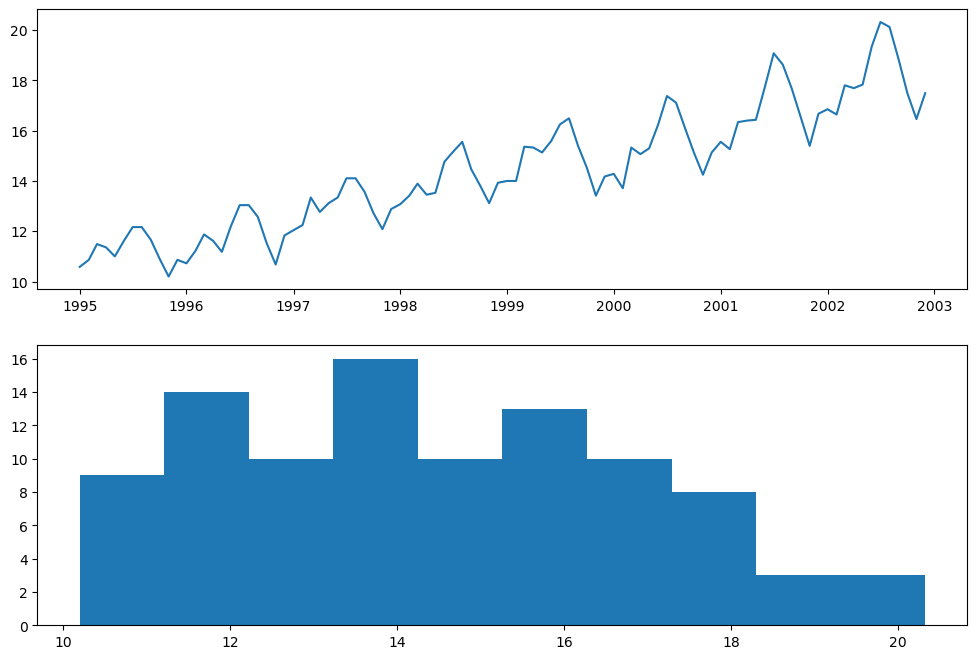

In [72]:
# Square Root Transform

square_root= pd.DataFrame()
square_root = airline_1[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)

# line chart

fig=plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(square_root['Passengers'])

# Histogram

plt.subplot(212)
plt.hist(square_root['Passengers'])
plt.show()



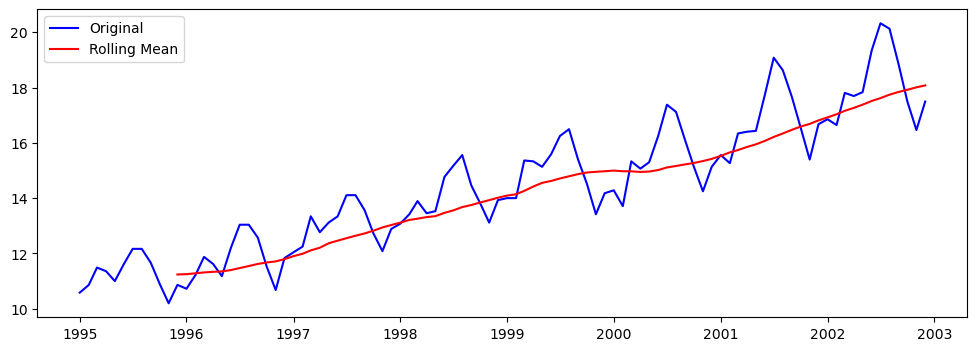

Resukts if Dickey Fuller Test:
Test Statistic                  0.451435
p-value                         0.983320
# Lags Used                    12.000000
Number of Observations Used    83.000000
Critical Value(1%)             -3.511712
Critical Value(5%)             -2.897048
Critical Value(10%)            -2.585713
dtype: float64


In [73]:
plt.figure(figsize=(12,4))
test_stationarity(square_root)

In [74]:
adf_test(square_root)

Fail to reject the null hypothesis
Data is non-stationary


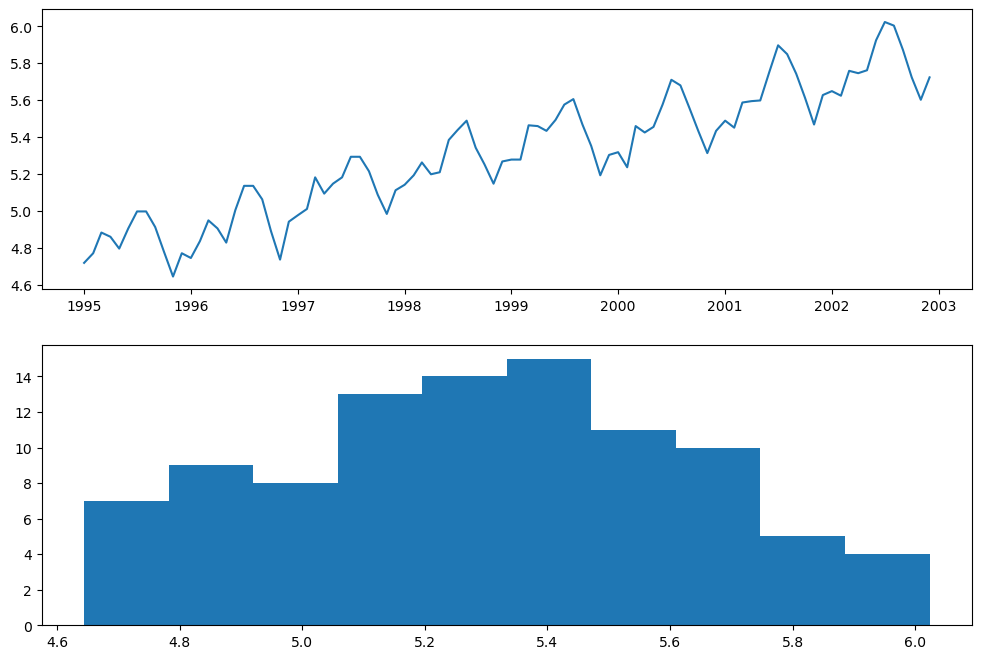

In [75]:
# Log Transform

log=pd.DataFrame()
log=airline_1[["Passengers"]]
log["Passengers"]=np.log(log.Passengers)

# Line Chart

fig=plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(log["Passengers"])

# Histogram

plt.subplot(212)
plt.hist(log["Passengers"])
plt.show()

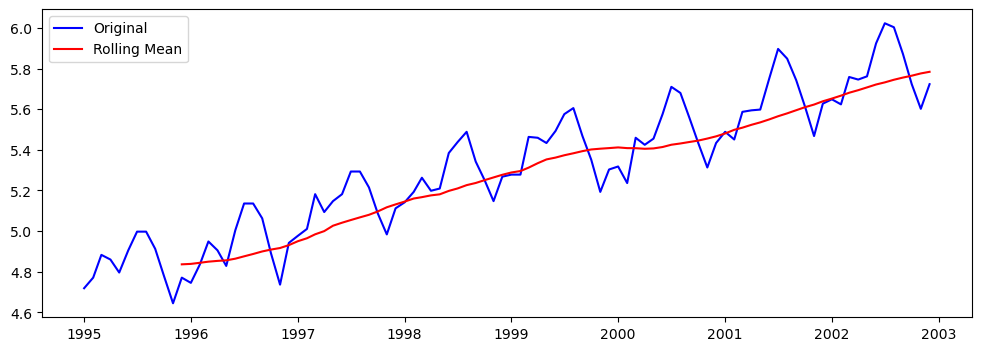

Resukts if Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
# Lags Used                    12.000000
Number of Observations Used    83.000000
Critical Value(1%)             -3.511712
Critical Value(5%)             -2.897048
Critical Value(10%)            -2.585713
dtype: float64


In [76]:
plt.figure(figsize=(12,4))
test_stationarity(log)

In [77]:
adf_test(log)

Fail to reject the null hypothesis
Data is non-stationary


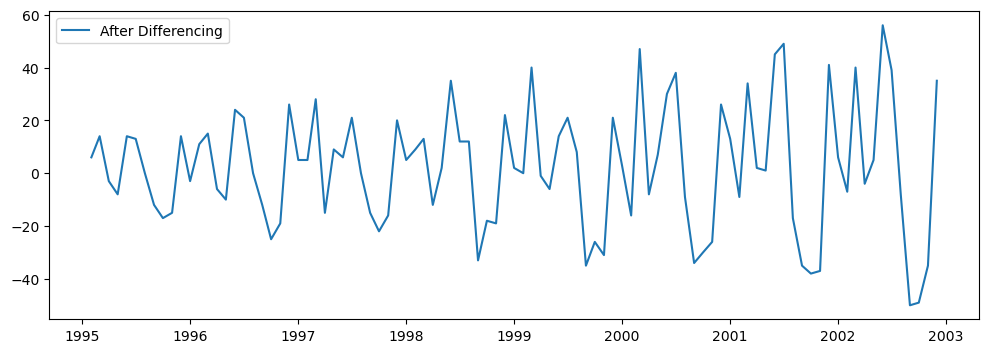

In [78]:
# Converting Non-Stationary Time Series into Stationary

# Differencing

differencing=airline_1-airline_1.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing,label="After Differencing")
plt.legend(loc="best")
plt.show()

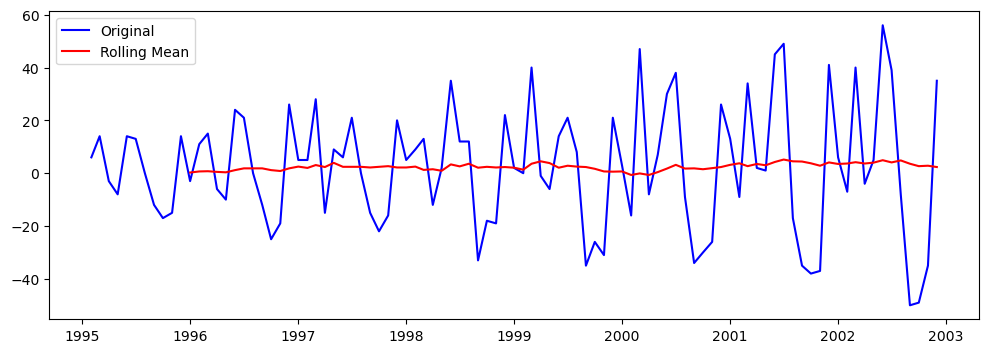

Resukts if Dickey Fuller Test:
Test Statistic                 -2.150002
p-value                         0.224889
# Lags Used                    12.000000
Number of Observations Used    82.000000
Critical Value(1%)             -3.512738
Critical Value(5%)             -2.897490
Critical Value(10%)            -2.585949
dtype: float64


In [79]:
plt.figure(figsize=(12,4))
test_stationarity(differencing)

In [80]:
adf_test(differencing)

Reject the null hypothesis
Data is stationary


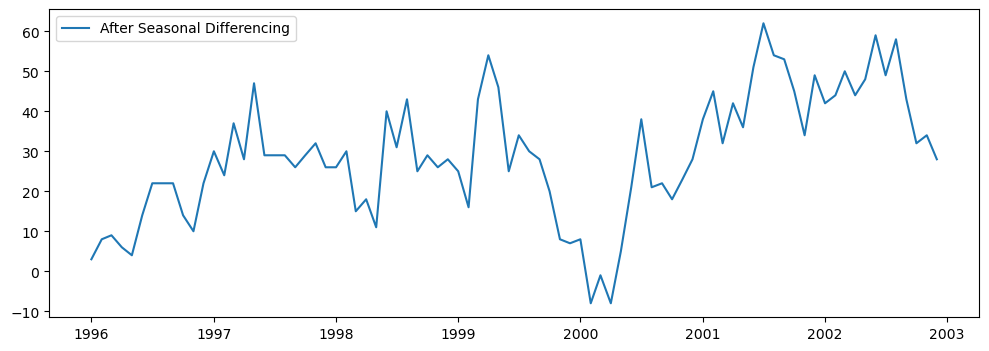

In [81]:
# Seasonal Differencing

seasonal_differencing=airline_1-airline_1.shift(12)
seasonal_differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(seasonal_differencing,label="After Seasonal Differencing")
plt.legend(loc="best")
plt.show()

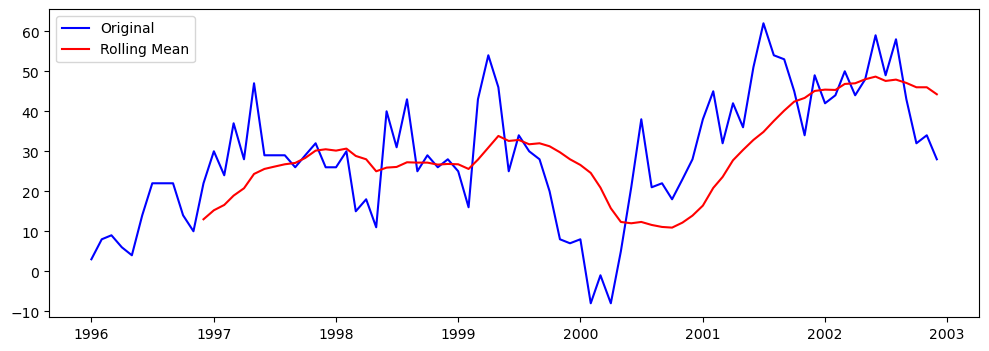

Resukts if Dickey Fuller Test:
Test Statistic                 -2.690004
p-value                         0.075784
# Lags Used                     1.000000
Number of Observations Used    82.000000
Critical Value(1%)             -3.512738
Critical Value(5%)             -2.897490
Critical Value(10%)            -2.585949
dtype: float64


In [82]:
plt.figure(figsize=(12,4))
test_stationarity(seasonal_differencing)

In [83]:
adf_test(seasonal_differencing)

Reject the null hypothesis
Data is stationary


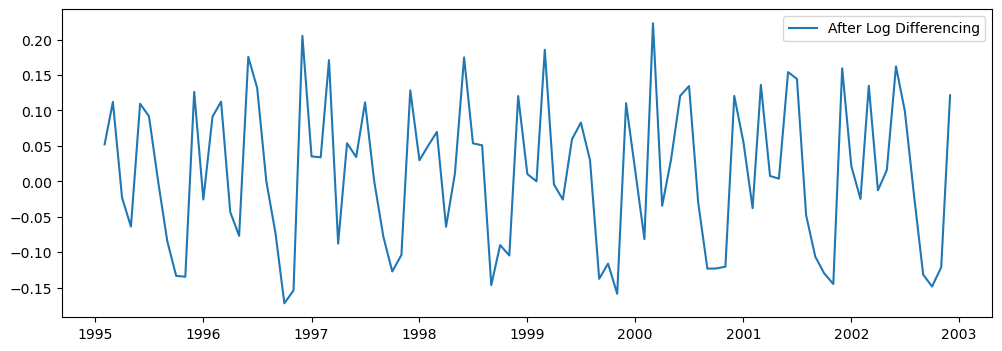

In [84]:
# Transformation

log_diff=log-log.shift(1)
log_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(log_diff,label="After Log Differencing")
plt.legend(loc="best")
plt.show()

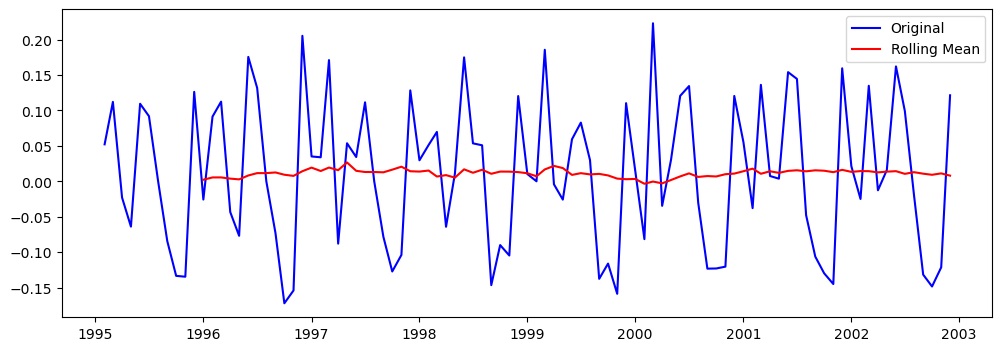

Resukts if Dickey Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
# Lags Used                    12.000000
Number of Observations Used    82.000000
Critical Value(1%)             -3.512738
Critical Value(5%)             -2.897490
Critical Value(10%)            -2.585949
dtype: float64


In [85]:
plt.figure(figsize=(12,4))
test_stationarity(log_diff)

In [86]:
adf_test(log_diff)

Reject the null hypothesis
Data is stationary


,Passengers
Date,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791


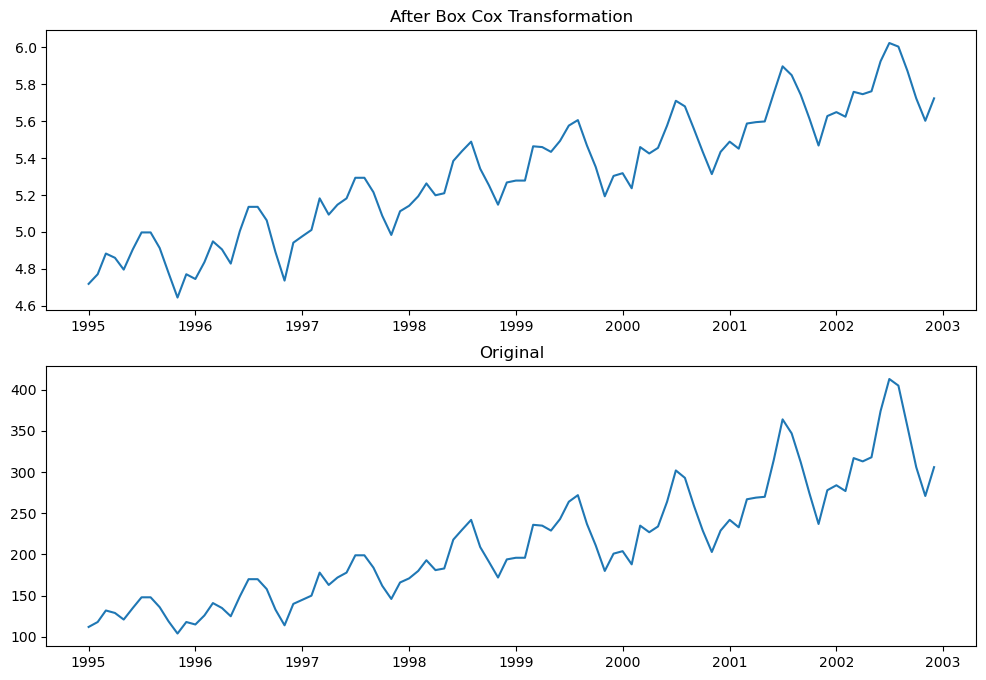

In [87]:
# Box Cox Transformation

data_boxcox = pd.DataFrame()
data_boxcox['Passengers'] = pd.Series(boxcox(airline_1['Passengers'], lmbda=0), airline_1.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(12,8))
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(airline_1, label='original')
axis[1].set_title('Original')
plt.show()

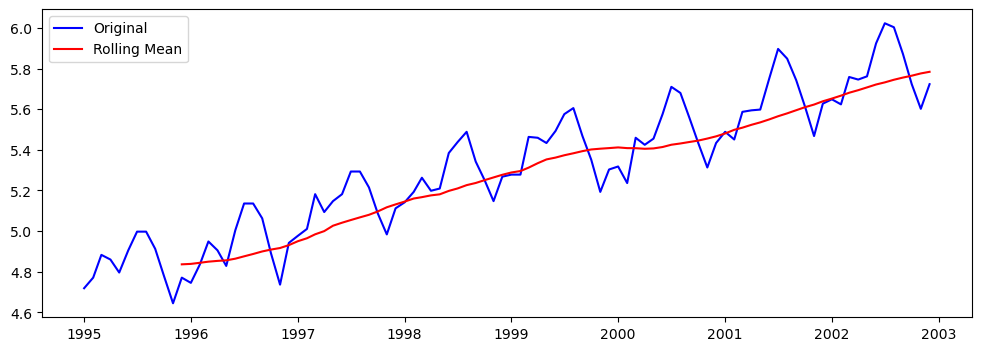

Resukts if Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
# Lags Used                    12.000000
Number of Observations Used    83.000000
Critical Value(1%)             -3.511712
Critical Value(5%)             -2.897048
Critical Value(10%)            -2.585713
dtype: float64


In [88]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox)

In [89]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


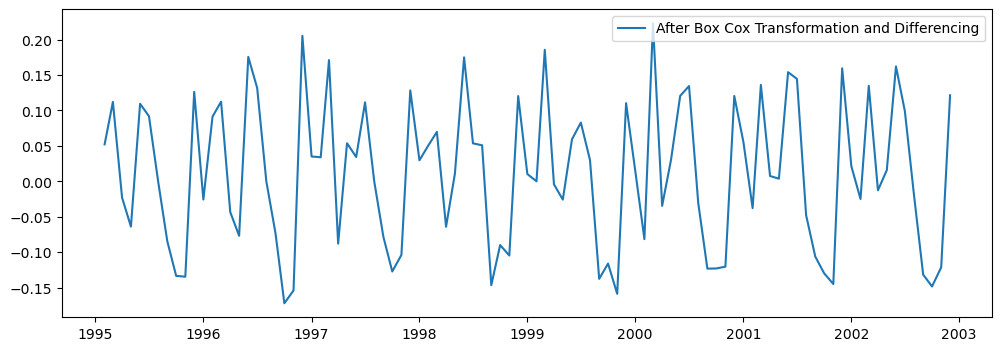

In [90]:
# Differencing of the Box-Cox Transformation

data_boxcox_diff=data_boxcox-data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff,label="After Box Cox Transformation and Differencing")
plt.legend(loc="best")
plt.show()

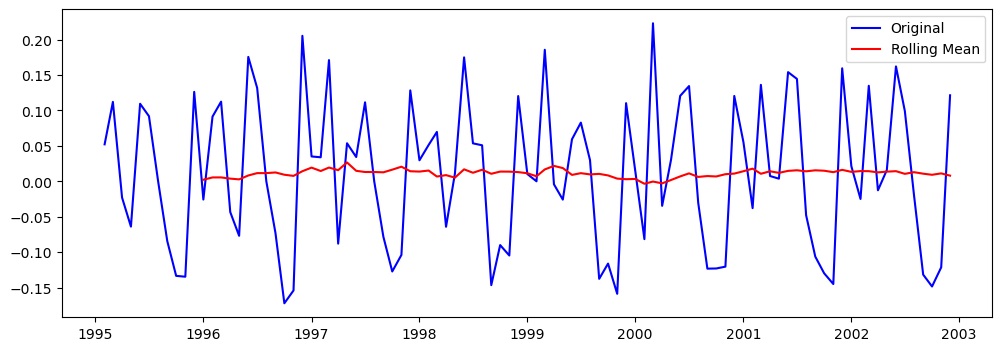

Resukts if Dickey Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
# Lags Used                    12.000000
Number of Observations Used    82.000000
Critical Value(1%)             -3.512738
Critical Value(5%)             -2.897490
Critical Value(10%)            -2.585949
dtype: float64


In [91]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox_diff)

In [92]:
adf_test(data_boxcox_diff)

Reject the null hypothesis
Data is stationary


In [93]:
# Building The Time Series Forecasting with Optimal Value using ARIMA

train_data_boxcox=data_boxcox[:size]
test_data_boxcox=data_boxcox[size:]
train_data_boxcox_diff=data_boxcox_diff[:size]
test_data_boxcox_diff=data_boxcox_diff[size:]

In [94]:
# ARIMA Hyperparameter Tuning

# Grid search ARIMA parameters for a time series
# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X,arima_order):
    # Preparing the training datset
    X=X.astype("float32")
    train_size=int(len(X)*0.70)
    train,test=X[0:train_size], X[train_size:]
    history=[x for x in train]
    
    #Predictions
    
    predictions=list()
    for t in range(len(test)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
        # Calculate the sample error
        
        rmse=sqrt(mean_squared_error(test,predictions))
        return rmse
    
# Evaluate combinations of P,d and qvalues for an ARIMA Model

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
    

In [95]:
# Evaluate parameters

p_values = range(0,5)
d_values = range(0,5)
q_values = range(0,5)
evaluate_models(train_data_boxcox_diff.Passengers, p_values, d_values, q_values)

Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers of samples: [22, 1]
Found input variables with inconsistent numbers 

In [96]:
# Inverse transformation of the Box-Cox Differencing

model = ARIMA(train_data_boxcox_diff, order=(4, 1, 4))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()

# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Passengers[0])

# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

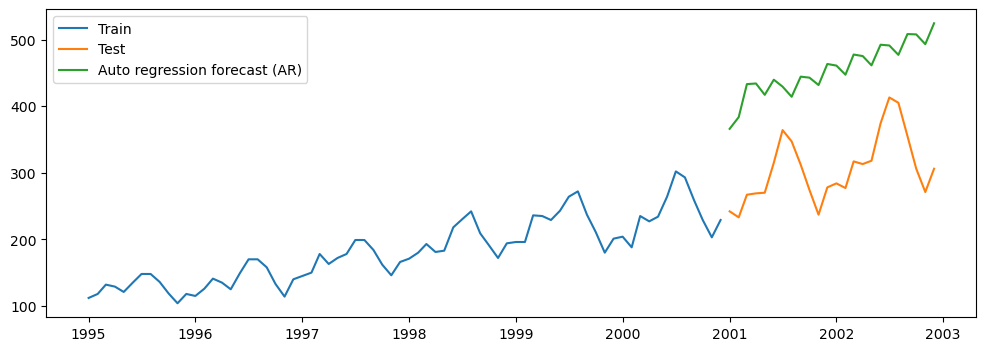

In [97]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

#  Model Evaluation

In [98]:
# RMSE (Root Mean Square Error)

rmse_arima=np.sqrt(mean_squared_error(test_data,y_hat_ar["arima_forecast"][test_data.index.min():])).round(2)
rmse_arima

154.9

In [100]:
# MAPE

mape_arima=round(np.mean(np.abs((test_data.Passengers-y_hat_ar["arima_forecast"][test_data.index.min():])/test_data.Passengers)*100),2)
mape_arima

51.04

In [102]:
# Analysing the Residuals

model_residual=model_fit.resid
model_residual.mean()

-0.005741995137453465

In [103]:
adf_test(model_residual)

Fail to reject the null hypothesis
Data is non-stationary


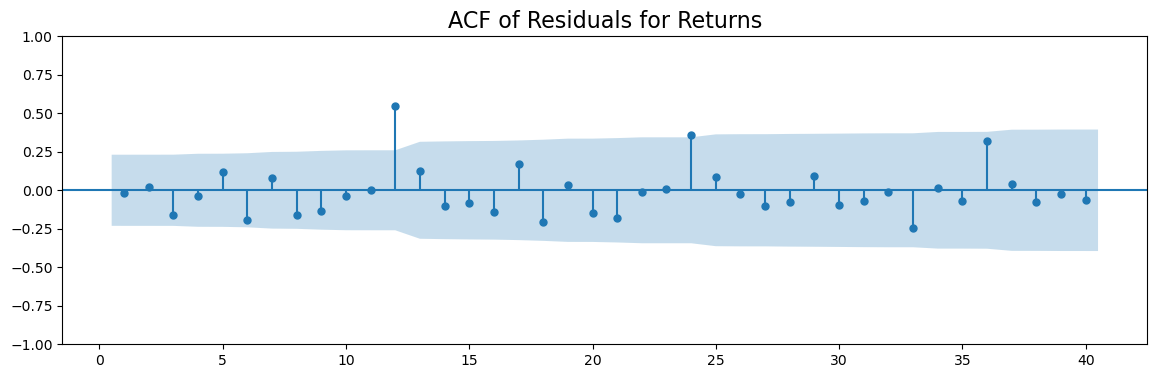

In [104]:
# No autocorrelation between residuals

plt.rcParams["figure.figsize"]=(14,4)
plot_acf(model_residual,zero=False,lags=40)
plt.title("ACF of Residuals for Returns",size=16)
plt.show()

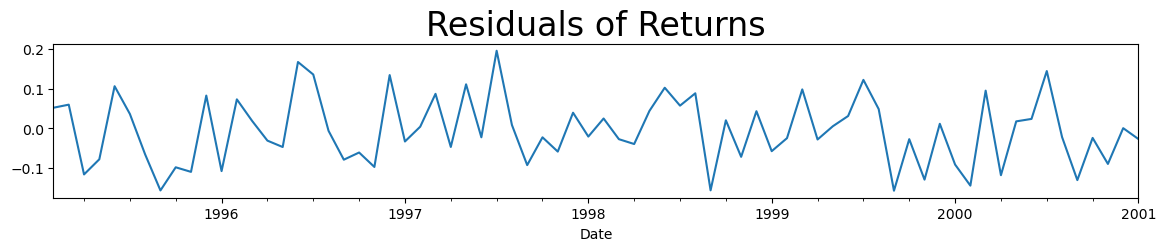

In [106]:
# Residuals must be random

model_residual.plot(figsize=(14,2))
plt.title("Residuals of Returns",size=24)
plt.show()

# Seasonal Auto Regressive Integrated Moving Average (SARIMA)

 

In [107]:
model=SARIMAX(train_data_boxcox,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()
y_hat_sarima=data_boxcox_diff.copy()


In [108]:
# Inverse Transformation of the Differencing Box-Cox Transformation

y_hat_sarima["sarima_forecast_boxcox"]=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_sarima["Sarima_forecast"]=np.exp(y_hat_sarima["sarima_forecast_boxcox"])
y_hat_sarima["sarima_forecast"]=np.exp(y_hat_sarima["sarima_forecast_boxcox"])

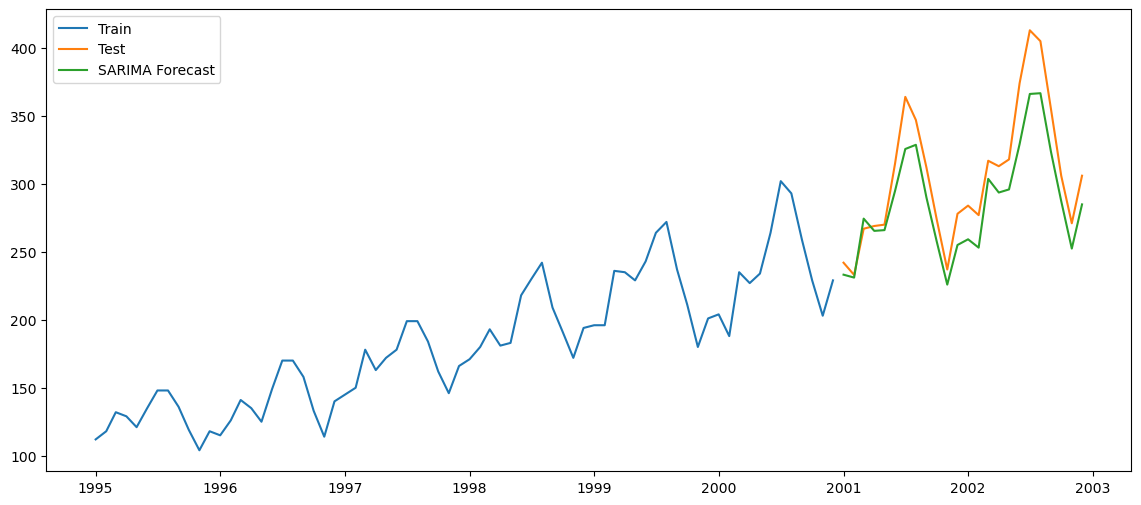

In [110]:

plt.figure(figsize=(14,6))
plt.plot(train_data["Passengers"],label="Train")
plt.plot(test_data,label="Test")
plt.plot(y_hat_sarima["sarima_forecast"][test_data.index.min():],label="SARIMA Forecast")
plt.legend(loc="best")
plt.show()

# Model Evaluation
 

In [111]:
# RMSE

rmse_sarima=np.sqrt(mean_squared_error(test_data,y_hat_sarima["sarima_forecast"][test_data.index.min():])).round(2)
rmse_sarima

23.98

In [112]:
# MAPE
mape_sarima=round(np.mean(np.abs((test_data.Passengers-y_hat_sarima["sarima_forecast"][test_data.index.min():])/test_data.Passengers)*100),2)
mape_sarima

6.43

In [113]:
# Analysing the Residuals

model_residual = model_fit.resid
model_residual.mean()

0.035873494305340495

In [114]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


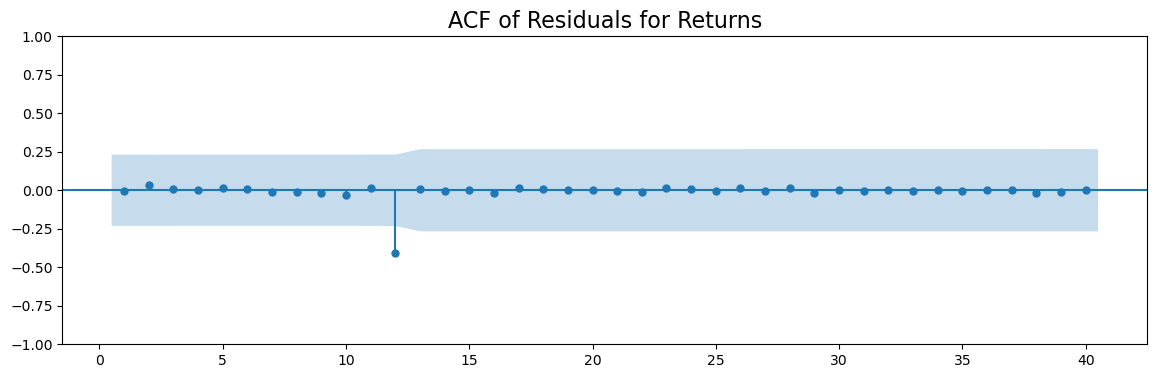

In [115]:
plt.rcParams["figure.figsize"]=(14,4)
plot_acf(model_residual,zero=False,lags=40)
plt.title("ACF of Residuals for Returns",size=16)
plt.show()

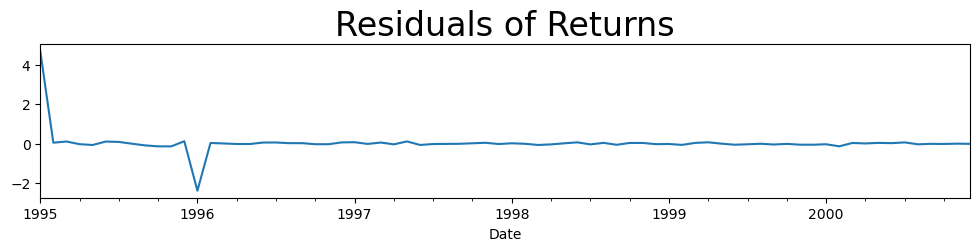

In [118]:
model_residual.plot(figsize=(12,2))
plt.title("Residuals of Returns",size=24)
plt.show()

#  Creating model with differente Transformation Technique
# Compareing the results

In [124]:
Evaluation = {"Models":pd.Series(["Simple_Exponential","Double_Exponential","Triple_Exp_Additive","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Multiplicative","ARIMA","SARIMA"]),
        "MAPE(%)":pd.Series([mape_ses,mape_holt,mape_trex_holt,mape_mul_add_holt,mape_add_mul_holtre,mape_multre_holt,mape_arima,mape_sarima]),
        "RMSE_Values":pd.Series([test_rmse_ses,test_rmse_holt,test_rmse_trex_holt,test_rmse_mul_add_holt,test_rmse_add_mul_holtre,test_rmse_multre_holt,rmse_arima,rmse_sarima])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_evaluation

,Models,MAPE(%),RMSE_Values
0,Triple_Exp_Multiplicative,6.035047,23.058733
1,SARIMA,6.430000,23.980000
2,Triple_Exp_Mul_Add,9.368335,34.989294
3,Triple_Exp_Additive,12.084991,47.570796
4,Triple_Exp_Add_Mul,13.662162,49.609866
5,Double_Exponential,13.785534,59.952412
6,Simple_Exponential,23.382283,91.113254
7,ARIMA,51.040000,154.900000


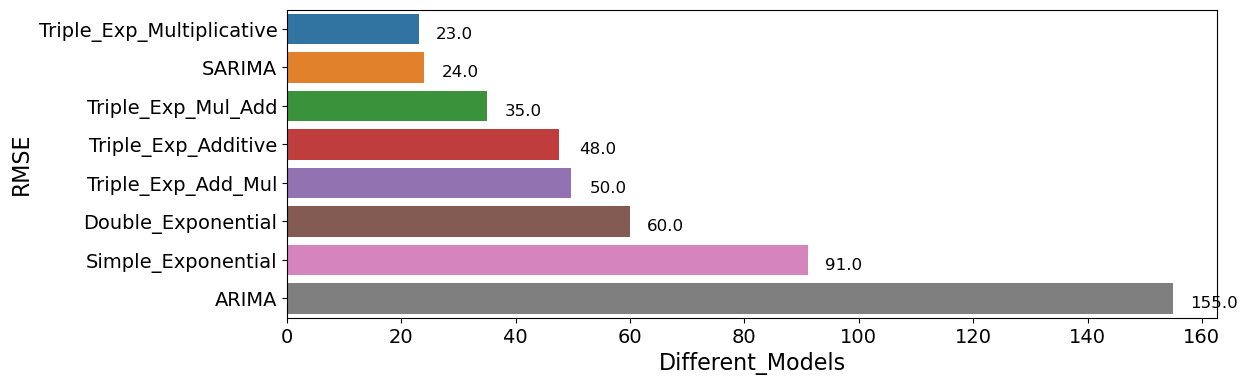

In [128]:
f,axe=plt.subplots(1,1,figsize=(12,4))
sns.barplot(x="RMSE_Values",y="Models",data=table_evaluation,ax=axe)
axe.set_xlabel("Different_Models",size=16)
axe.set_ylabel("RMSE",size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.RMSE_Values.values,0)):
    axe.text(v+3,i+ .25,str(v),fontsize=12)
    
plt.show()

In [130]:
# Data Pre-processing for Model Driven Techniques

df = airline.copy()
df.reset_index(inplace=True)
df['t'] = np.arange(1,len(df)+1)
df['t_squared'] = np.square(df.t)
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y")  # year extraction
months = pd.get_dummies(df['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
df = pd.concat([df,months],axis=1)
df['log_passengers'] = np.log(df['Passengers'])
df

,index,Date,Passengers,month,year,t,t_squared,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,0,1995-01-01,112,Jan,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1,1995-02-01,118,Feb,1995,2,4,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,2,1995-03-01,132,Mar,1995,3,9,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,3,1995-04-01,129,Apr,1995,4,16,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,4,1995-05-01,121,May,1995,5,25,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,2002-08-01,405,Aug,2002,92,8464,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,92,2002-09-01,355,Sep,2002,93,8649,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,93,2002-10-01,306,Oct,2002,94,8836,0,0,0,0,0,0,0,0,0,1,0,0,5.723585
94,94,2002-11-01,271,Nov,2002,95,9025,0,0,0,0,0,0,0,0,0,0,1,0,5.602119


In [131]:
# Splitting the data into training and testing

train_data=df.iloc[:size]
test_data=df.iloc[size:]

In [132]:
train_data

,index,Date,Passengers,month,year,t,t_squared,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,0,1995-01-01,112,Jan,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1,1995-02-01,118,Feb,1995,2,4,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,2,1995-03-01,132,Mar,1995,3,9,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,3,1995-04-01,129,Apr,1995,4,16,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,4,1995-05-01,121,May,1995,5,25,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,2000-08-01,293,Aug,2000,68,4624,0,0,0,0,0,0,0,1,0,0,0,0,5.680173
68,68,2000-09-01,259,Sep,2000,69,4761,0,0,0,0,0,0,0,0,1,0,0,0,5.556828
69,69,2000-10-01,229,Oct,2000,70,4900,0,0,0,0,0,0,0,0,0,1,0,0,5.433722
70,70,2000-11-01,203,Nov,2000,71,5041,0,0,0,0,0,0,0,0,0,0,1,0,5.313206


In [133]:
test_data

,index,Date,Passengers,month,year,t,t_squared,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
72,72,2001-01-01,242,Jan,2001,73,5329,1,0,0,0,0,0,0,0,0,0,0,0,5.488938
73,73,2001-02-01,233,Feb,2001,74,5476,0,1,0,0,0,0,0,0,0,0,0,0,5.451038
74,74,2001-03-01,267,Mar,2001,75,5625,0,0,1,0,0,0,0,0,0,0,0,0,5.587249
75,75,2001-04-01,269,Apr,2001,76,5776,0,0,0,1,0,0,0,0,0,0,0,0,5.594711
76,76,2001-05-01,270,May,2001,77,5929,0,0,0,0,1,0,0,0,0,0,0,0,5.598422
77,77,2001-06-01,315,Jun,2001,78,6084,0,0,0,0,0,1,0,0,0,0,0,0,5.752573
78,78,2001-07-01,364,Jul,2001,79,6241,0,0,0,0,0,0,1,0,0,0,0,0,5.897154
79,79,2001-08-01,347,Aug,2001,80,6400,0,0,0,0,0,0,0,1,0,0,0,0,5.849325
80,80,2001-09-01,312,Sep,2001,81,6561,0,0,0,0,0,0,0,0,1,0,0,0,5.743003
81,81,2001-10-01,274,Oct,2001,82,6724,0,0,0,0,0,0,0,0,0,1,0,0,5.613128


In [136]:
# Building Ordinary Square Model

# Linear Model

linear_model=smf.ols("Passengers~t",data=train_data).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test_data["t"])))
rmse_linear=np.sqrt(np.mean((np.array(test_data["Passengers"])-np.array(pred_linear))**2))
rmse_linear


51.667792995646224

In [140]:
# Exponential Model

exp = smf.ols('log_passengers~t',data=train_data).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test_data['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

42.552328946004636

In [141]:
# Quadratic Model

quad=smf.ols("Passengers~t+t_squared",data=train_data).fit()
pred_quad=pd.Series(quad.predict(test_data[["t","t_squared"]]))
rmse_quad=np.sqrt(np.mean((np.array(test_data["Passengers"])-np.array(pred_quad))**2))
rmse_quad

51.99073640155396

In [143]:
# Additive seasonality

add_sea=smf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train_data).fit()
pred_add_sea=pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea=np.sqrt(np.mean((np.array(test_data["Passengers"])-np.array(pred_add_sea))**2))
rmse_add_sea

127.26451565320338

In [144]:
# Additive Seasonality Quadratic

add_sea_quad=smf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train_data).fit()
pred_add_sea_quad=pd.Series(add_sea_quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(test_data["Passengers"])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

127.26451565320338

In [147]:
# Multiplicative Seasonality

mul_sea=smf.ols("log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train_data).fit()
pred_mult_sea=pd.Series(mul_sea.predict(test_data))
rmse_mult_sea=np.sqrt(np.mean((np.array(test_data["Passengers"])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea
                      

132.1876280026344

In [149]:
# Multiplicative Additive Seasonality
mul_add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test_data))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

11.714670246780615

In [150]:
np.exp(pred_mult_add_sea)

72    245.378110
73    251.466317
74    290.915247
75    278.690401
76    275.377947
77    308.136092
78    340.898573
79    343.777446
80    308.799188
81    271.947832
82    238.912819
83    273.505888
84    280.894281
85    287.863698
86    333.022490
87    319.028212
88    315.236312
89    352.735890
90    390.240432
91    393.535995
92    353.494963
93    311.309720
94    273.493201
95    313.093291
dtype: float64

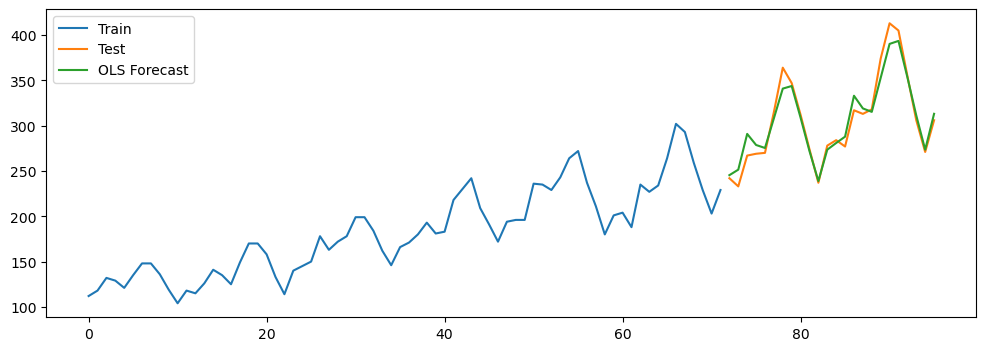

In [152]:

plt.figure(figsize=(12,4))
plt.plot(train_data["Passengers"],label="Train")
plt.plot(test_data["Passengers"],label="Test")
plt.plot(np.exp(pred_mult_add_sea),label="OLS Forecast")
plt.legend(loc="best")
plt.show()

In [153]:
# Comparing the results

data = {"Models":pd.Series(["RMSE_Linear","RMSE_Exp","RMSE_Quad","RMSE_Add_Sea","RMSE_Add_Sea_Quad","RMSE_Mult_Sea","RMSE_Mult_Add_Sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)



In [154]:
e = table_rmse.append(table_evaluation)
e.drop('MAPE(%)', axis=1, inplace=True)
e.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

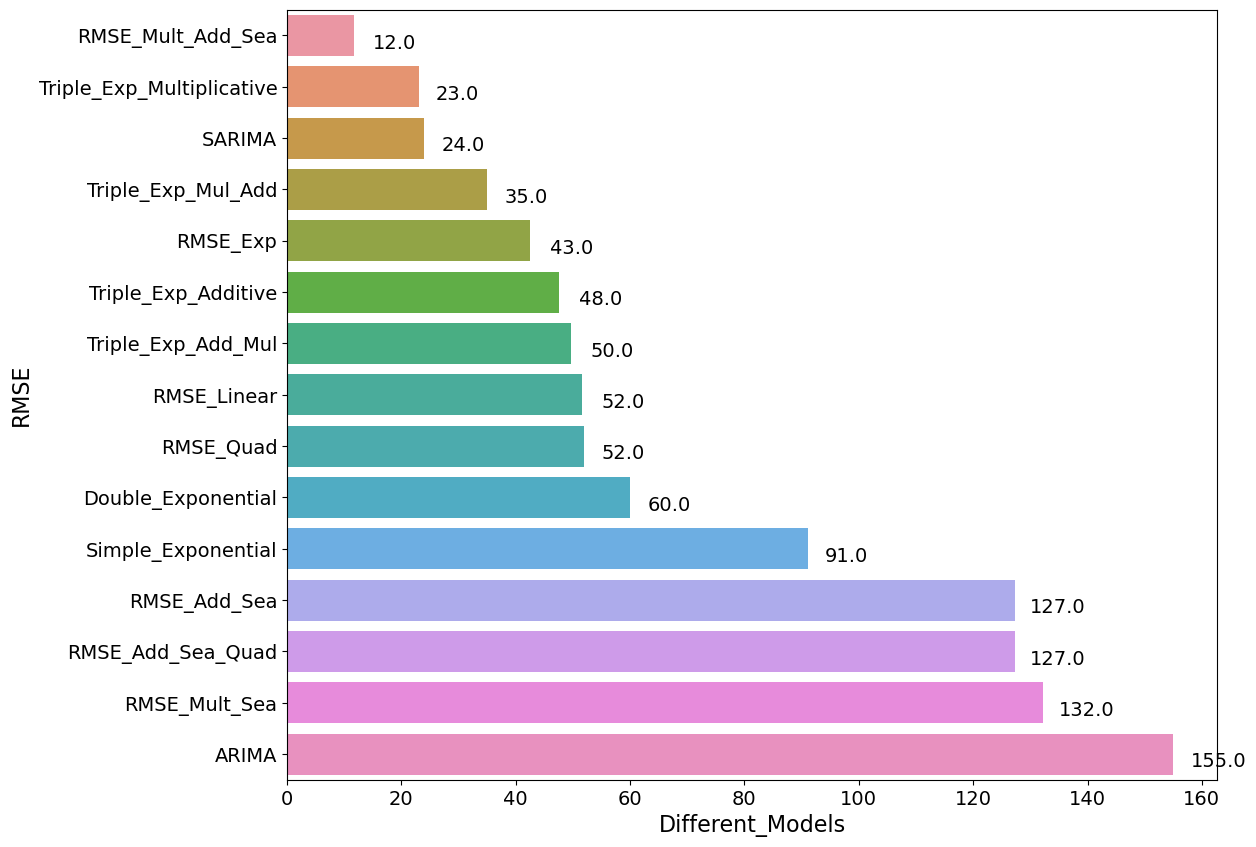

In [155]:
f, axe = plt.subplots(1,1, figsize=(12,10))
sns.barplot(x='RMSE_Values', y='Models', data=e, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(e.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)

plt.show()